<a href="https://colab.research.google.com/github/motaleider7/Prediccion-si-el-individuo-gana-mas-de-50000-dolares-al-ano/blob/main/Cross_Validation_Leider_Mota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto machine learning: 'Predicción si el individuo gana más de 50K al año' 📈📉**
Autor: Leider Mota

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1. **Introducción.**

## 1.1. **Abstracto, motivación y audiencia.**



La motivación detrás de este proyecto radica en el interés de entender los patrones y variables que determinan si una persona superará el umbral de ingresos de 50,000 dólares al año. Esto puede ser valioso para personas que buscan mejorar sus ingresos, para empresas que desean optimizar sus estrategias de mercado y para gobiernos que necesitan comprender la distribución de ingresos en la población.

La audiencia objetivo de este proyecto incluye:

Analistas y científicos de datos interesados en técnicas de predicción y clasificación.
Empresas y organizaciones que buscan mejorar su enfoque de marketing y segmentación de clientes.
Economistas y formuladores de políticas interesados en comprender la dinámica de ingresos en la sociedad.

## 1.2. **Contexto comercial.**

En el contexto comercial, esta predicción puede ayudar a empresas de distintos sectores a dirigir sus esfuerzos de marketing y ventas hacia segmentos específicos de la población con mayores probabilidades de tener ingresos más altos. Al identificar a los clientes potenciales con mayores ingresos, las empresas pueden adaptar sus productos y servicios para satisfacer mejor sus necesidades y, al mismo tiempo, optimizar sus recursos y estrategias de negocio.


## 1.3. **Problema comercial.**

El problema comercial que abordamos es la identificación de aquellos individuos que tienen mayores posibilidades de ganar más de 50,000 dólares al año. Esta clasificación permitirá a las empresas dirigirse a este grupo objetivo con mayor precisión, lo que a su vez puede aumentar la eficiencia y efectividad de sus esfuerzos de marketing y ventas.

## 1.4. **Contexto analítico.**

En el contexto analítico, utilizaremos técnicas avanzadas de aprendizaje automático y minería de datos para procesar y analizar un conjunto de datos previamente recolectado. Estos datos pueden incluir variables como edad, educación, ocupación, estado civil, ubicación, entre otras. A partir de esta información, desarrollaremos y evaluaremos modelos predictivos que nos permitan determinar qué individuos tienen más probabilidades de superar el umbral de ingresos establecido. La precisión y eficacia de estos modelos serán fundamentales para el éxito del proyecto y para brindar información valiosa a la audiencia objetivo.

## 1.5. **Hipótesis.**

**Preguntas principales o primarias.**

1.   ¿Cuáles son las características que influyen en ganar más o menos de 50,000 dólares al año?
2.   ¿Qué algoritmo será el mejor para predecir “variable y”?
3.   ¿Qué columnas seran las mejores para predecir “variable y”?

**Preguntas secundarias (nos ayudaran a contestar las principales) .**

1.   ¿Cuáles trabajos te permiten ganar más de $50.000 dólares al año?

2.   ¿La edad está relacionada con ganar más de $50.000 al año?
3.   ¿El sexo influye en tu salario?
4.   ¿Cuánta educación hay que tener para ser una persona con un alto salario?







# 2. **Data acquisition.**

En este proyecto, fueron extraídos 32.561 observaciones de la base de datos de la Oficina del Censo de 1994, recopilados por Ronny Kohavi y Barry Becker en su trabajo sobre Data Mining and Visualization, en Silicon Graphics. El objetivo principal de esta tarea de predicción es determinar si una persona gana más de $50.000 dolares al año.

## 2.1. **Importacion de librerias.**

In [ ]:
# librerias para el analisis de datos
import pandas as pd
import numpy as np

# librerias para graficacion de datos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Librerías para la importación de archivos
from google.colab import drive
import tarfile

## 2.2. **Importación del conjunto de datos.**

In [ ]:
# creando carpeta para importar archivos
drive.mount('carpeta')

Mounted at carpeta


In [ ]:
# ubicando el archivo en la carpeta donde se encuentra el dataset
%cd /content/carpeta/MyDrive/CoderHouse/Data Science 42365 Leider Mota/data

/content/carpeta/MyDrive/CoderHouse/Data Science 42365 Leider Mota/data


In [ ]:
# importar dataset y indicando que el separador del csv sea una coma ','
adultos = pd.read_csv('adult.csv', sep = ',')

## 2.3. **Columnas del conjunto de datos.**

A continuación, se presentan las diferentes columnas que componen el conjunto de datos, cada una con su respectiva descripción:

*   Edad: Representa la edad del individuo registrado en años.
*   Clase de trabajo: Indica la categoría o tipo de trabajo en el que está empleado el individuo.
*   Fnlwgt: Es el peso final asignado al individuo durante el proceso de muestreo, utilizado para la estimación de la población.
*   Educación: Refleja el nivel educativo alcanzado por el individuo (ej. escuela secundaria, licenciatura, posgrado, etc.).
*   Número de Educación: Representa el número de años de educación completados por el individuo.
*   Estado civil: Describe el estado civil del individuo (ej. soltero, casado, divorciado, etc.).
*   Trabajo: Indica el tipo de ocupación que realiza el individuo.
*   Relación: Describe la relación con respecto a la familia (ej. esposo, esposa, hijo, etc.).
*   Raza: Representa la raza o etnia del individuo.
*   Sexo: Indica el género del individuo (masculino o femenino).
*   Plusvalía: Hace referencia a las ganancias de capital obtenidas por el individuo.
*   Pérdida de Capital: Indica las pérdidas de capital sufridas por el individuo.
*   Horas de trabajo por semana: Representa el número de horas trabajadas por semana.
*   País Nativo: Indica el país de origen del individuo.
*   Ingreso_y (Si gana o no gana más de 50k al año): Esta columna determina si el individuo gana más de 50,000 dólares al año (1) o no (0).



# 3. **Data wrangling.**

Se llevará a cabo un proceso de preprocesamiento de los datos con el objetivo de adecuar el conjunto de datos a la fase de análisis exploratorio de datos y para poder responder a las preguntas planteadas en la investigación. Este proceso permitirá preparar los datos de manera que sean más apropiados y efectivos para su posterior análisis.

## 3.1. **Traducción del conjunto de datos al español.**

Al observar que los datos y las columnas están en inglés, se procederá a realizar la traducción para facilitar el análisis del conjunto de datos.

In [ ]:
# traduciendo al espanol todas las columnas
adultos = adultos.rename(columns={
    'age': 'edad', 'workclass': 'clase_trabajo', 'fnlwgt': 'fnlwgt', 'education': 'educacion', 'education.num': 'educacion_num',
       'marital.status': 'estado_civil', 'occupation': 'trabajo', 'relationship': 'relacion', 'race': 'raza', 'sex': 'sexo',
       'capital.gain': 'plusvalia', 'capital.loss': 'perdida_capital', 'hours.per.week': 'horas_trabajo_semanal', 'native.country' : 'pais_nativo',
       'income': 'ingreso_y'
       })

In [ ]:
# traduciendo al espanol todas las filas de la columna 'pais_nativo'
adultos['pais_nativo'] = adultos['pais_nativo'].replace({
    'United-States': 'Estados Unidos',
    'Mexico': 'Mexico',
    'Greece': 'Grecia',
    'Vietnam': 'Vietnam',
    'China': 'China',
    'Taiwan': 'Taiwan',
    'India': 'India',
    'Philippines': 'Filipinas',
    'Trinadad&Tobago': 'Trinidad y Tobago',
    'Canada': 'Canada',
    'South': 'Sur',
    'Holand-Netherlands': 'Paises Bajos',
    'Puerto-Rico': 'Puerto Rico',
    'Poland': 'Polonia',
    'Iran': 'Irán',
    'England': 'Inglaterra',
    'Germany': 'Alemania',
    'Italy': 'Italia',
    'Japan': 'Japón',
    'Hong': 'Hong Kong',
    'Honduras': 'Honduras',
    'Cuba': 'Cuba',
    'Ireland': 'Irlanda',
    'Cambodia': 'Camboya',
    'Peru': 'Perú',
    'Nicaragua': 'Nicaragua',
    'Dominican-Republic': 'Republica Dominicana',
    'Haiti': 'Haiti',
    'El-Salvador': 'El Salvador',
    'Hungary': 'Hungria',
    'Columbia': 'Colombia',
    'Guatemala': 'Guatemala',
    'Jamaica': 'Jamaica',
    'Ecuador': 'Ecuador',
    'France': 'Francia',
    'Yugoslavia': 'Yugoslavia',
    'Scotland': 'Escocia',
    'Portugal': 'Portugal',
    'Laos': 'Laos',
    'Thailand': 'Tailandia',
    'Outlying-US(Guam-USVI-etc)': 'Territorios Exteriores de EE. UU.'
})

In [ ]:
# traduciendo al espanol todas las filas de la columna 'clase_trabajo'
adultos['clase_trabajo'] = adultos['clase_trabajo'].replace({
    'Private': 'Privado',
    'State-gov': 'Gobierno estatal',
    'Federal-gov': 'Gobierno federal',
    'Self-emp-not-inc': 'Autonomo sin incorporacion',
    'Self-emp-inc': 'Autonomo con incorporacion',
    'Local-gov': 'Gobierno local',
    'Without-pay': 'Sin remuneracion',
    'Never-worked': 'Nunca ha trabajado'

})


In [ ]:
# traduciendo al espanol todas las filas de la columna 'educacion'
adultos['educacion'] = adultos['educacion'].replace({
    'HS-grad': 'Graduado de escuela secundaria',
    'Some-college': 'Algo de universidad',
    'Doctorate': 'Doctorado',
    'Prof-school': 'Escuela profesional',
    'Bachelors': 'Licenciatura',
    'Masters': 'Maestria',
    'Assoc-acdm': 'Asociado - Administracion',
    'Assoc-voc': 'Asociado - Vocacional',
})

# simplificando columna educacion
adultos['educacion'] = adultos['educacion'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],'Escuela')

In [ ]:
# traduciendo al espanol todas las filas de la columna 'estado_civil'
adultos['estado_civil'] = adultos['estado_civil'].replace({
    'Widowed': 'Viudo/a',
    'Divorced': 'Divorciado/a',
    'Separated': 'Separado/a',
    'Never-married': 'Soltero/a',
    'Married-civ-spouse': 'Casado/a - Cónyuge civil',
    'Married-spouse-absent': 'Casado/a - Conyuge ausente',
    'Married-AF-spouse': 'Casado/a - Conyuge en la Fuerza Aérea'
})

In [ ]:
# traduciendo al espanol todas las filas de la columna 'trabajo'
adultos['trabajo'] = adultos['trabajo'].replace({
    'Exec-managerial': 'Directivo ejecutivo',
    'Machine-op-inspct': 'Operador de maquinas e inspector',
    'Prof-specialty': 'Especialista profesional',
    'Other-service': 'Otros servicios',
    'Adm-clerical': 'Administrativo y de oficina',
    'Craft-repair': 'Artesano y reparación',
    'Transport-moving': 'Transporte y movimiento',
    'Handlers-cleaners': 'Manipuladores y limpiadores',
    'Sales': 'Ventas',
    'Farming-fishing': 'Agricultura y pesca',
    'Tech-support': 'Soporte tecnico',
    'Protective-serv': 'Servicios de proteccion',
    'Armed-Forces': 'Fuerzas Armadas',
    'Priv-house-serv': 'Servicio domestico privado'
})

In [ ]:
# traduciendo al espanol todas las filas de la columna 'relacion'
adultos['relacion'] = adultos['relacion'].replace({
    'Not-in-family': 'No en la familia',
    'Unmarried': 'Soltero/a',
    'Own-child': 'Hijo/a propio/a',
    'Other-relative': 'Otro pariente',
    'Husband': 'Esposo',
    'Wife': 'Esposa'
})

In [ ]:
# traduciendo al espanol todas las filas de la columna 'sexo'
adultos['sexo'] = adultos['sexo'].replace({
    'Female': 'Femenino',
    'Male': 'Masculino'
})

In [ ]:
# traduciendo al espanol todas las filas de la columna 'raza'
adultos['raza'] = adultos['raza'].replace({
    'White': 'Blanco',
    'Black': 'Negro',
    'Asian-Pac-Islander': 'Asiático de las Islas del Pacífico',
    'Other': 'Otro',
    'Amer-Indian-Eskimo': 'Indio Americano / Esquimal'
})

## 3.2. **Valores faltantes.**



In [ ]:
# mostrando los nuevos datos nulos
adultos.isnull().sum()

edad                     0
clase_trabajo            0
fnlwgt                   0
educacion                0
educacion_num            0
estado_civil             0
trabajo                  0
relacion                 0
raza                     0
sexo                     0
plusvalia                0
perdida_capital          0
horas_trabajo_semanal    0
pais_nativo              0
ingreso_y                0
dtype: int64

Es evidente que no se encuentran valores nulos en el conjunto de datos. La razón de esta ausencia de datos nulos radica en que en el dataset, los valores faltantes están representados por el carácter '?'.

In [ ]:
# reemplazando '?' por datos nulos
adultos = adultos.replace('?', np.nan)

In [ ]:
# mostrando los nuevos datos nulos
print('Nulos:\n:', adultos.isnull().sum())

Nulos:
: edad                        0
clase_trabajo            1836
fnlwgt                      0
educacion                   0
educacion_num               0
estado_civil                0
trabajo                  1843
relacion                    0
raza                        0
sexo                        0
plusvalia                   0
perdida_capital             0
horas_trabajo_semanal       0
pais_nativo               583
ingreso_y                   0
dtype: int64


<Axes: >

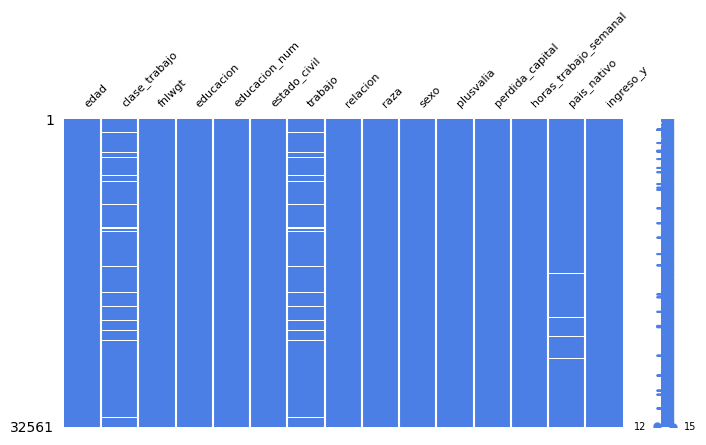

In [ ]:
# graficar datos nulos
msno.matrix(adultos, figsize=(8,4), color=(0.3, 0.5, 0.9), fontsize=8)

Dado que la cantidad de datos nulos es muy reducida en comparación con el tamaño del dataset, se ha tomado la decisión de eliminarlos. Esto se realiza con el propósito de prevenir posibles errores futuros y garantizar la integridad de los datos.

In [ ]:
# eliminar datos nulos
adultos = adultos.dropna()

## 3.3. **Valores atípicos.**

### 3.3.1. **Histogramas**

Se comenzará por aplicar el análisis de histogramas a las variables numéricas de interés.

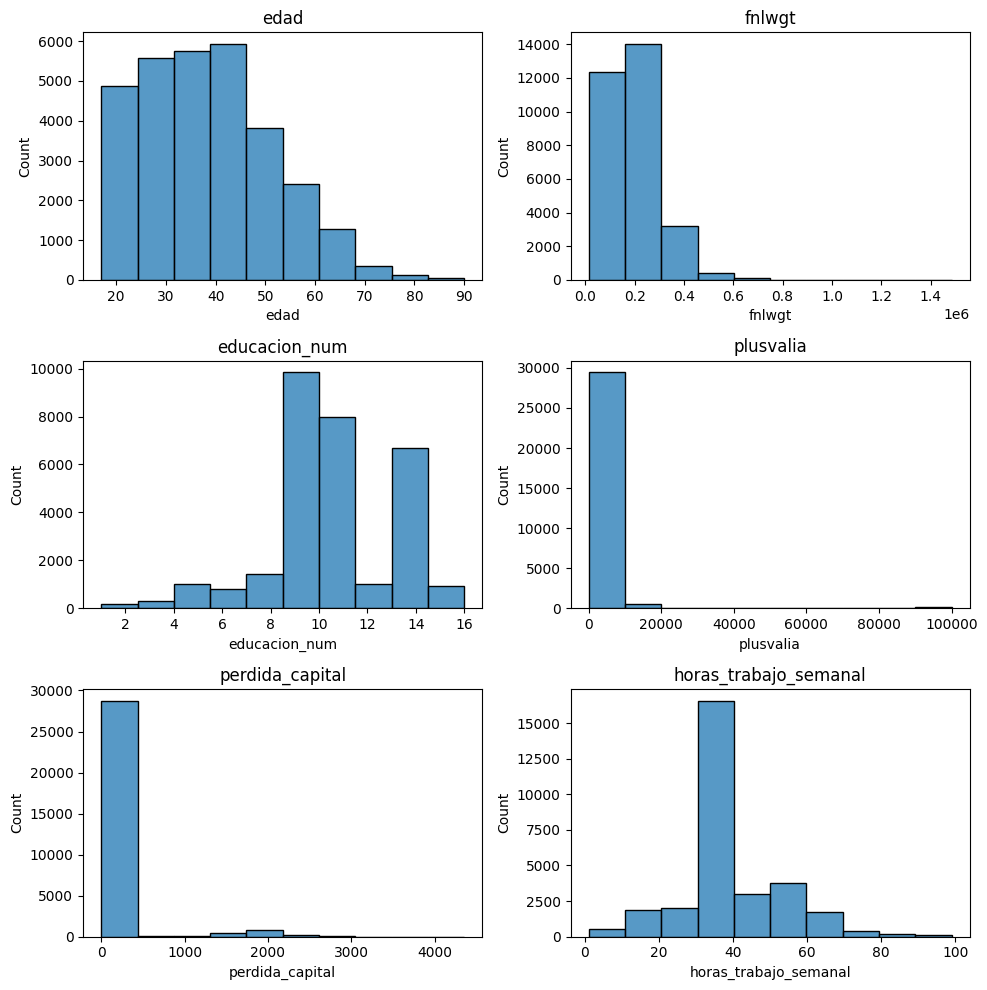

In [ ]:
# seleccionar las columnas solo con datos numericos y eliminar las creadas para el modelo
adultos_numericas = adultos.select_dtypes(include='number')

# calcular el número de filas y columnas para la cuadrícula de subparcelas
num_plots = len(adultos_numericas.columns)
num_rows = (num_plots + 1) // 2
num_cols = 2

# crear la cuadrícula de subparcelas
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# iterar sobre las columnas numéricas y generar los histogramas
for i, columna in enumerate(adultos_numericas.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]
    sns.histplot(adultos[columna], bins=10, ax=ax)
    ax.set_title(columna)

# ajustar los espacios entre las subparcelas
plt.tight_layout()

# mostrar
plt.show()

### 3.3.2. **Gráficos de caja**

A continuación, se empleará gráficos de caja para visualizar los rangos intercuartiles.

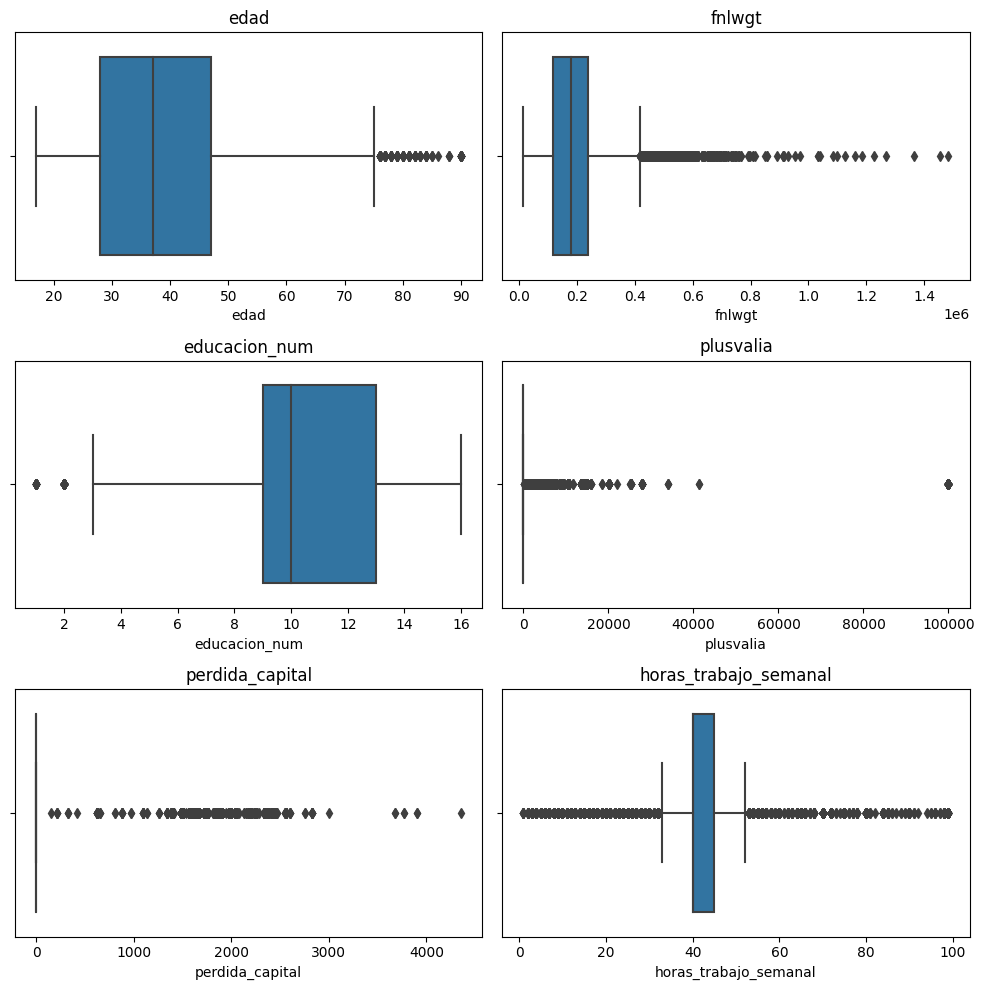

In [ ]:
# calcular el número de filas y columnas para la cuadrícula de subparcelas
num_plots = len(adultos_numericas.columns)
num_rows = (num_plots + 1) // 2
num_cols = 2

# crear la cuadrícula de subparcelas
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# iterar sobre las columnas numéricas y generar los boxplots
for i, columna in enumerate(adultos_numericas.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]
    sns.boxplot(x=columna, data=adultos, ax=ax)
    ax.set_title(columna)

# ajustar los espacios entre las subparcelas
plt.tight_layout()

# mostrar
plt.show()

**Análisis**

Durante el proceso de revisión, se identificaron varios valores atípicos (outliers) en algunas de las columnas del conjunto de datos. No obstante, se optó por mantener estos valores atípicos, ya que se considera que son esenciales para abordar y responder las preguntas planteadas en el análisis.

## 3.4. **Valores duplicados.**

In [ ]:
# verificar si hay filas duplicadas en todo el dataframe
duplicates = adultos.duplicated()

# cuenta cuántas filas duplicadas hay
num_duplicates = duplicates.sum()
print(f"Número de filas duplicadas: {num_duplicates}")

Número de filas duplicadas: 23


Se ha decidido proceder con la eliminación de las filas duplicadas en el conjunto de datos. Esto se lleva a cabo para garantizar la consistencia y la integridad de la información en el análisis.

In [ ]:
# eliminar duplicados
adultos = adultos.drop_duplicates()

# 4. **Exploratory data analysis (EDA).**

En esta sección, se realizará un análisis exploratorio de datos minucioso y exhaustivo sobre el dataframe.

## 4.1. **Análisis del conjunto de datos.**

Se proporcionará una visión general de los datos contenidos en el conjunto de datos.

In [ ]:
# mostrando primera vista del dataframe
adultos.head(3)

,edad,clase_trabajo,fnlwgt,educacion,educacion_num,estado_civil,trabajo,relacion,raza,sexo,plusvalia,perdida_capital,horas_trabajo_semanal,pais_nativo,ingreso_y
1,82,Privado,132870,Graduado de escuela secundaria,9,Viudo/a,Directivo ejecutivo,No en la familia,Blanco,Femenino,0,4356,18,Estados Unidos,<=50K
3,54,Privado,140359,Escuela,4,Divorciado/a,Operador de maquinas e inspector,Soltero/a,Blanco,Femenino,0,3900,40,Estados Unidos,<=50K
4,41,Privado,264663,Algo de universidad,10,Separado/a,Especialista profesional,Hijo/a propio/a,Blanco,Femenino,0,3900,40,Estados Unidos,<=50K


In [ ]:
# mostrar informacion que son relevantes en el dataframe
print ("En total, nuestro dataset original posee " + str(adultos.shape[0]) + " filas y " + str(adultos.shape[1]) + ' columnas')

En total, nuestro dataset original posee 30139 filas y 15 columnas


Además, se llevará a cabo un análisis de la metadatos de las variables más relevantes.

In [ ]:
# conteo de sexo
sexo = adultos['sexo'].value_counts()
# ver % de tipos de raza
raza = adultos['raza'].value_counts().reset_index()
raza.columns = ['Raza', 'Conteo']
raza['Porcentaje'] = round((raza['Conteo'] / raza['Conteo'].sum()) * 100, 2)
raza['Porcentaje'] = raza['Porcentaje'].astype(str) + '%'
# ver % de la variable y
ingresos = adultos['ingreso_y'].value_counts().reset_index()
ingresos.columns = ['Ingresos', 'Conteo']
ingresos['Porcentaje'] = round((raza['Conteo'] / raza['Conteo'].sum()) * 100, 2)
ingresos['Porcentaje'] = raza['Porcentaje'].astype(str)

In [ ]:
print ('\u2022 hay ' + str(adultos.shape[0]) + ' observaciones para analizar para analizar con sus ' + str(adultos.shape[1]) + ' variables de datos.')
print ('\u2022 son ' + str(adultos['trabajo'].nunique()) + ' tipos de diferentes trabajos analizados.')
print ('\u2022 existen ' + str(adultos['educacion'].nunique()) + ' tipos de estudios diferentes en el dataset, desde graduado de escuela primaria, hasta alguien con doctorado.')
print ('\u2022 hay ' + str(adultos['estado_civil'].nunique()) + ' estados civiles analizados, como soltero, viudo, casado, entre otros.')
print ('\u2022 las personas analizadas en este dataset tienen en promedio ' + str(adultos['edad'].mean().round(1)) + ' anos.')
print ('\u2022 las personas analizadas en este dataset trabajan en promedio ' + str(adultos['horas_trabajo_semanal'].mean().round(1)) + ' horas a la semana.')
print ('\u2022 en el dataset se analiza a ' + str(sexo['Masculino']) + ' hombres y ' + str(sexo['Femenino']) + ' mujeres.')
print ('\u2022 el ' + str(raza.iloc[0, 2]) + ' de las personas analizadas en el dataset son blancas.')
print ('\u2022 el ' + str(ingresos.iloc[0, 2]) + ' de las personas analizadas ganan menos de 50.000 dolares al ano.')

• hay 30139 observaciones para analizar para analizar con sus 15 variables de datos.
• son 14 tipos de diferentes trabajos analizados.
• existen 9 tipos de estudios diferentes en el dataset, desde graduado de escuela primaria, hasta alguien con doctorado.
• hay 7 estados civiles analizados, como soltero, viudo, casado, entre otros.
• las personas analizadas en este dataset tienen en promedio 38.4 anos.
• las personas analizadas en este dataset trabajan en promedio 40.9 horas a la semana.
• en el dataset se analiza a 20366 hombres y 9773 mujeres.
• el 85.97% de las personas analizadas en el dataset son blancas.
• el 85.97% de las personas analizadas ganan menos de 50.000 dolares al ano.


Observemos un análisis de las estadísticas descriptivas de nuestro DataFrame en sus columnas numéricas:

In [ ]:
adultos.describe()

,edad,fnlwgt,educacion_num,plusvalia,perdida_capital,horas_trabajo_semanal
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## 4.2. **Análisis multivariado.**

En esta etapa, utilizaremos un mapa de calor para visualizar las correlaciones entre las variables del conjunto de datos.

<ipython-input-31-2410d8bb9b8b>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(adultos_mapa.corr(), cmap = 'Blues_r', annot = True)


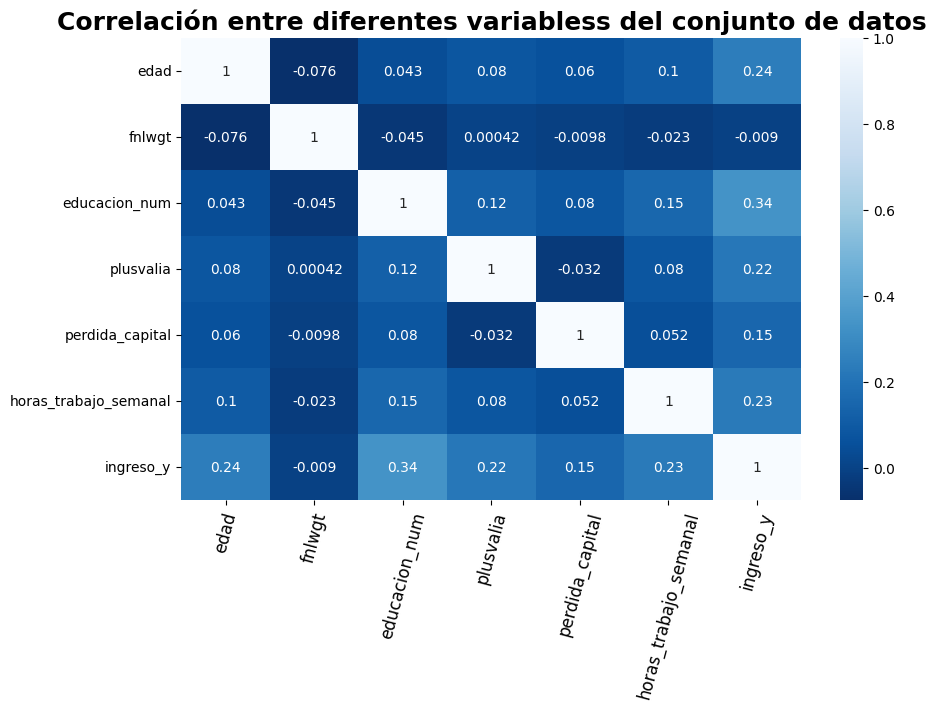

In [ ]:
# anadir variables en mapa
adultos_mapa = adultos.copy()
adultos_mapa['ingreso_y']= adultos_mapa['ingreso_y'].map({'<=50K': 0, '>50K': 1})

# tamano
plt.figure(figsize = (10,6))

# grafico
sns.heatmap(adultos_mapa.corr(), cmap = 'Blues_r', annot = True)

# leyendas y titulos
plt.title('Correlación entre diferentes variabless del conjunto de datos', fontsize = 18, fontweight = 'bold')
plt.xticks(fontsize=12, rotation = 75)

plt.show()

**Analisis del Gráfico**

En este análisis, se ha creado exitosamente un mapa de correlación para determinar las relaciones entre las características independientes y la variable dependiente.

Se observa que la mayoría de las características muestran una correlación positiva con la variables de 'ingreso_y'. Esto sugiere que estas características tienen una influencia significativa en la variable objetivo y pueden ser predictivas de mayores ingresos.

Sin embargo, es importante mencionar que este gráfico de correlación no incluye las relaciones con variables categóricas o de etiquetas. Para obtener una imagen más completa, sería necesario realizar un análisis de correlación específico para estas variables y evaluar su impacto en el resultado general.

En general, este mapa de correlación proporciona una visión valiosa de las relaciones lineales entre las características numéricas y la variable de interés, pero se deben realizar análisis adicionales para considerar otras variables relevantes.

# 5. **Preguntas de investigación.**

En esta sección, se llevará a cabo un análisis exhaustivo con el propósito de abordar las preguntas de investigación que servirán de base para la creación del modelo de machine learning.

## 5.1. **¿Cuáles trabajos te permiten ganar más de $50.000 dólares al año?**

**Hipótesis**

Es ampliamente reconocido que ocupaciones altamente especializadas, como médicos o directores generales de empresas, suelen ser las que generan los mayores ingresos, mientras que otras profesiones que no requieren un nivel tan elevado de educación o que son más comunes suelen tener ingresos más bajos. En este contexto, formulamos las siguientes hipótesis:

*   **H$_1$**: Los trabajos mejor remunerados están fuertemente relacionados con un mayor nivel de educación y roles de liderazgo en la jerarquía organizacional. Además, es probable que las personas en estos trabajos trabajen más horas.
*   **H$_0$**: La hipótesis nula plantea que no necesariamente existe una relación directa entre el nivel de educación y la posición jerárquica con los ingresos, y que es igualmente probable que una persona sin educación universitaria gane más de $50.000 al año que otra con educación universitaria.

### 5.1.1. **Examinando las profesiones y explorando las oportunidades laborales en distintos roles.**

In [ ]:
# creando groupby para generar el grafico
trabajo_y = adultos.groupby(['trabajo', 'ingreso_y']).size().unstack(fill_value=0).reset_index()
trabajo_y = trabajo_y.rename(columns={0: '<=50K', 1: '>50K'})

# cambiandolo de formato
trabajo_y_long = trabajo_y.melt(
    id_vars='trabajo',
    value_vars=['<=50K', '>50K'],
    var_name='variables').sort_values('value', ascending=False)

# calcular las probabilidades y reorganizar los datos
trabajo_y['probabilidad_trabajo_>50K'] = (
    (trabajo_y['>50K'] / (trabajo_y['<=50K'] + trabajo_y['>50K'])) * 100
    ).round(2).astype(float)
trabajo_y['probabilidad_trabajo_<=50K'] = 100 - trabajo_y['probabilidad_trabajo_>50K']

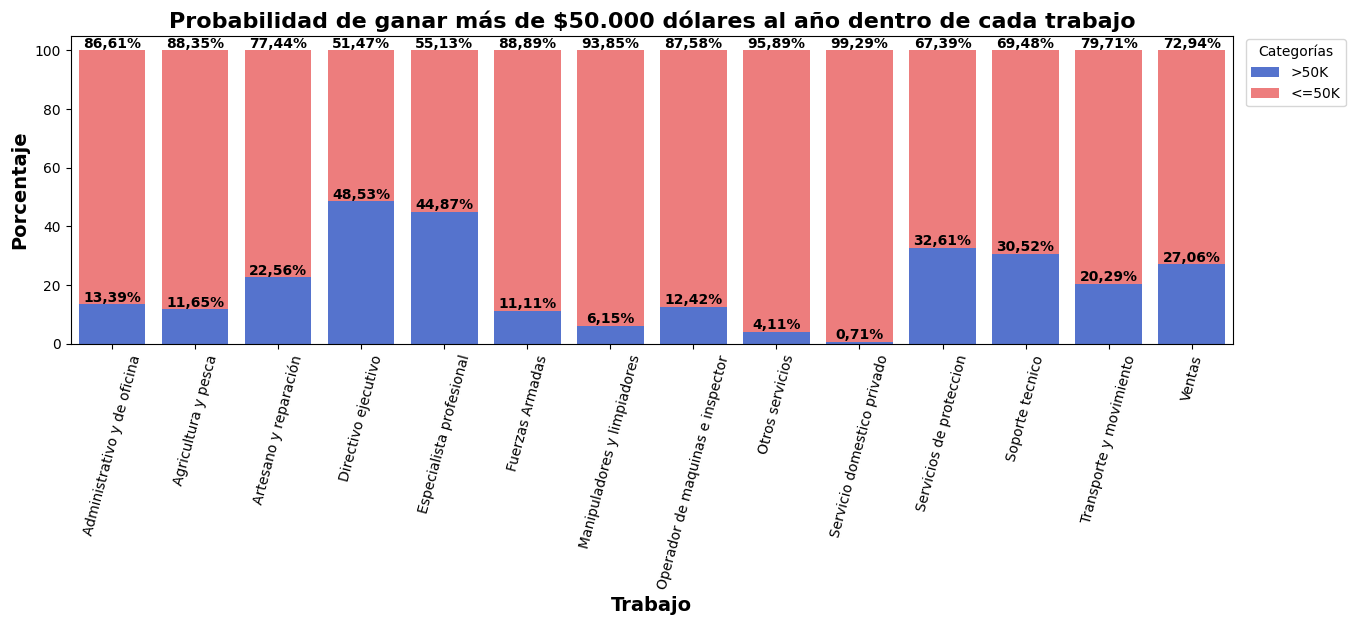

In [ ]:
# generando marco
fig, ax =  plt.subplots(figsize=(15, 4))

# configuar colores
colores = sns.color_palette(['#4169E1', '#FF6B6B'])

# creando barplots
ax = sns.barplot(data=trabajo_y, x='trabajo', y='probabilidad_trabajo_>50K', label='>50K', palette=[colores[0]])
sns.barplot(data=trabajo_y, x='trabajo', y='probabilidad_trabajo_<=50K', label='<=50K', bottom=trabajo_y['probabilidad_trabajo_>50K'], palette=[colores[1]])

# función para agregar etiquetas de datos a cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%'.replace('.', ','), (x + width/2, y + height + 1), ha='center', fontsize=10, fontweight='bold', color='black')

# configurar etiquetas y leyendas
plt.xlabel('Trabajo', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje', fontsize=14, fontweight='bold')
plt.title('Probabilidad de ganar más de $50.000 dólares al año dentro de cada trabajo', fontsize=16, fontweight='bold')
plt.xticks(rotation=75)

# colocar la leyenda a un lado
plt.legend(title='Categorías', bbox_to_anchor=(1.005, 0.88), loc='center left')

# mostrar el gráfico
plt.show()

**Observaciones e Insights**


*   Los resultados del gráfico respaldan nuestra hipótesis alternativa. Los directores ejecutivos y los especialistas profesionales son los más propensos a ganar más de $50,000 al año.

*  Resulta sorprendente que los trabajadores de servicios de protección también tengan una alta probabilidad de tener salarios altos.

*  Un hallazgo importante es la variable "otros", que muestra un 0% de probabilidades de tener un salario alto. Para evitar sesgar un modelo futuro, se recomienda eliminar esta variable, ya que representa trabajos desconocidos, y no se dispone de información para evaluar sus posibilidades en este contexto.

### 5.1.2. **¿Qué tantas horas a la semana trabajan en promedio por profesión?**

In [ ]:
horas_trabajo = adultos.groupby('trabajo')['horas_trabajo_semanal'].mean().round(2).reset_index()
horas_trabajo = horas_trabajo.sort_values('horas_trabajo_semanal', ascending=True)

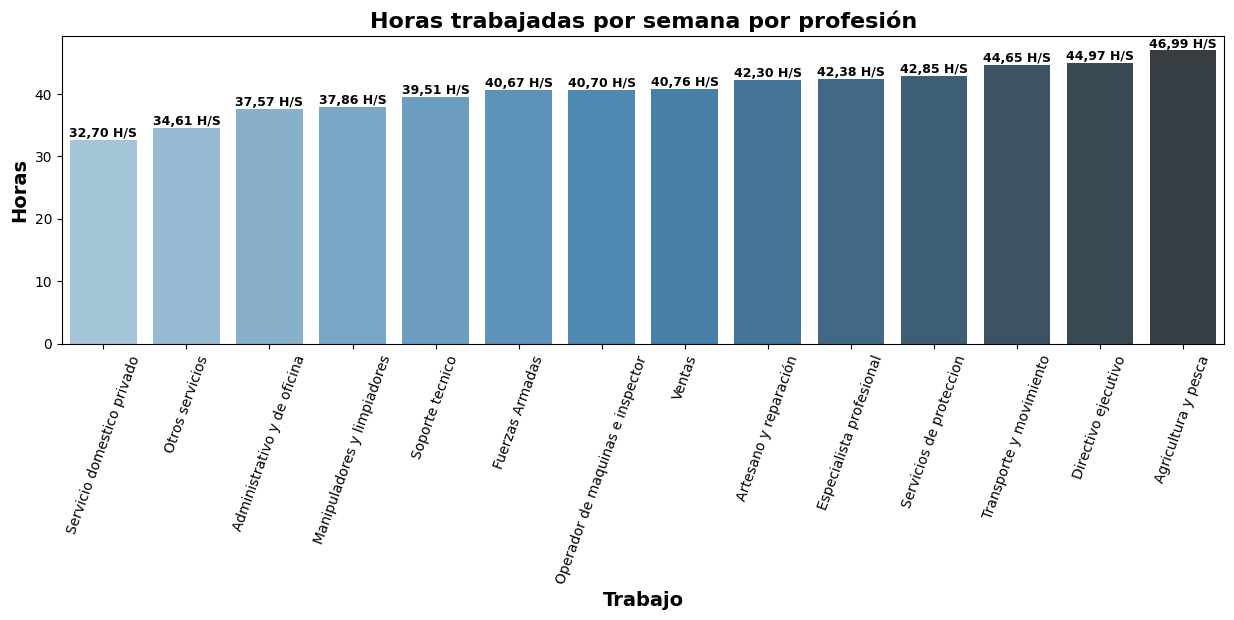

In [ ]:
# generando marco
fig, ax =  plt.subplots(figsize=(15, 4))

# creando grafico
sns.barplot(x="trabajo", y="horas_trabajo_semanal", data=horas_trabajo, palette='Blues_d')

# añadir etiquetas de datos a cada barra
labels = [f'{height:.2f}'.replace('.', ',') + ' H/S' for height in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], fontsize=9, fontweight='bold', labels=labels)

# configurar etiquetas y leyendas
plt.xlabel('Trabajo', fontsize=14, fontweight='bold')
plt.ylabel('Horas', fontsize=14, fontweight='bold')
plt.title('Horas trabajadas por semana por profesión', fontsize=16, fontweight='bold')
plt.xticks(rotation=70)

# mostrar grafico
plt.show()

**Resultados inesperados**

*  El sector de Agricultura y Pesca, que generalmente no se considera altamente remunerado, se destaca por tener el promedio más alto de horas trabajadas. Estos resultados subrayan el desequilibrio en la remuneración en nuestra sociedad, donde muchas personas no reciben una compensación justa por su arduo trabajo.

*  Además, en apoyo a la hipótesis alternativa, observamos que los dos tipos de trabajo que habíamos planteado como los más propensos a obtener un salario más alto se encuentran entre los cinco trabajos que, en promedio, requieren más horas de trabajo.

Estos resultados inesperados ponen de manifiesto la complejidad de las dinámicas laborales y económicas, y destacan que las horas de trabajo no siempre se correlacionan directamente con los ingresos en todas las profesiones.

### 5.1.3. **La educación en las profesiones.**

In [ ]:
# groupby de conteo de trabajos por educacion y agregando columna con porcentaje
trabajo_educacion = adultos.groupby(['trabajo', 'educacion']).size().reset_index(name='conteo')
trabajo_educacion['porcentaje'] = round((trabajo_educacion['conteo'] / trabajo_educacion.groupby('trabajo')['conteo'].transform('sum')) * 100, 2)
# eliminando columna de conteo que ya no necesito
trabajo_educacion = trabajo_educacion.drop('conteo', axis=1)

# ordenar por 'trabajo' y 'porcentaje' en orden descendente
trabajo_educacion = trabajo_educacion.sort_values(['trabajo', 'porcentaje'], ascending=[False, False])

# seleccionar los top 3 más grandes por trabajo
trabajo_educacion = trabajo_educacion.groupby('trabajo').head(3)

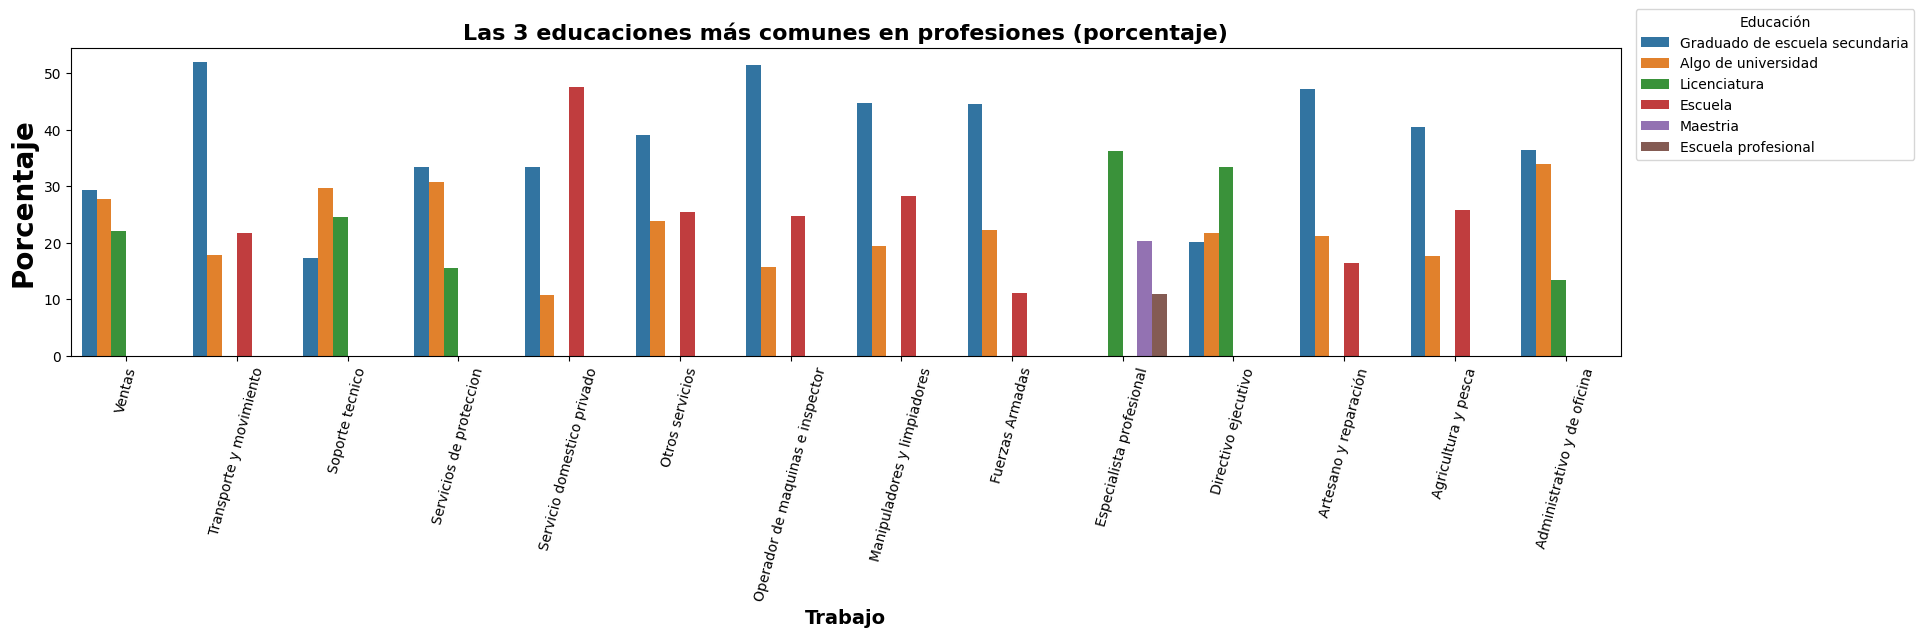

In [ ]:
# generando marco
fig, ax =  plt.subplots(figsize=(20, 4))

# creando grafico
sns.barplot(x="trabajo", y="porcentaje", data=trabajo_educacion, hue='educacion')

# configurar etiquetas y leyendas
plt.xlabel('Trabajo', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje', fontsize=20, fontweight='bold')
plt.title('Las 3 educaciones más comunes en profesiones (porcentaje)', fontsize=16, fontweight='bold')
plt.xticks(rotation=75)

# colocar la leyenda a un lado
plt.legend(title='Educación', bbox_to_anchor=(1.005, 0.88), loc='center left')

plt.show()

**Observaciones e Insights**

*  El gráfico proporciona un fuerte respaldo a la hipótesis alternativa. Se observa que tanto los directores ejecutivos como los especialistas profesionales son las únicas ocupaciones en las que la mayoría de las personas ocupando estos puestos tienen al menos una licenciatura.

*  Además, destaca que los especialistas profesionales son únicos entre todas las profesiones al ser los únicos que frecuentemente tienen una maestría como parte de su educación. Esto subraya la importancia de la educación en estas ocupaciones de alto nivel.

Estas observaciones refuerzan la idea de que el nivel de educación puede estar fuertemente relacionado con las ocupaciones mejor remuneradas y de mayor jerarquía en la organización.

**Conclusión general**

Las observaciones y insights proporcionados revelan una relación compleja entre la educación, la jerarquía laboral y los ingresos. Aunque la hipótesis alternativa encuentra respaldo en la correlación entre una mayor educación y ocupaciones mejor remuneradas, los resultados inesperados, como el hecho de que trabajadores en Agricultura y Pesca trabajan muchas horas a pesar de los ingresos más bajos, subrayan la complejidad de las dinámicas laborales y económicas.

Es fundamental reconocer que, si bien la educación es un factor importante, no es el único determinante de los ingresos y la jerarquía laboral. Factores adicionales, como la industria, también influyen en gran medida en estas dinámicas. Por lo tanto, es esencial considerar una gama de variables al analizar las relaciones entre la educación, la jerarquía laboral y los ingresos.

## 5.2. **¿La edad está relacionada con ganar más de $50.000 al año?**

**Hipótesis**

Al plantear esta pregunta, se espera que la edad esté fuertemente relacionada con los ingresos y que exista una correlación positiva hasta cierto punto.

*  **H$_1$**: A medida que las personas envejecen, es más probable que ganen más dinero, hasta un cierto punto en sus carreras laborales.

*  **H$_0$**: No existe una relación significativa entre la edad y los ingresos de una persona; la edad no influye en la cantidad de dinero que gana.

### 5.2.1. **Conteo por edades y la probabilidad de superar la barrera segun tu edad.**

In [ ]:
# ajustar las edades en grupos
adultos['categoria_edad'] = np.where(
    (adultos['edad'] > 18) & (adultos['edad'] < 31), '19-30',
    np.where((adultos['edad'] > 30) & (adultos['edad'] < 41), '31-40',
    np.where((adultos['edad'] > 40) & (adultos['edad'] < 51), '41-50',
    np.where((adultos['edad'] > 50) & (adultos['edad'] < 61), '51-60',
    np.where((adultos['edad'] > 60) & (adultos['edad'] < 71), '61-70',
    'Mayor que 70'))))
    )

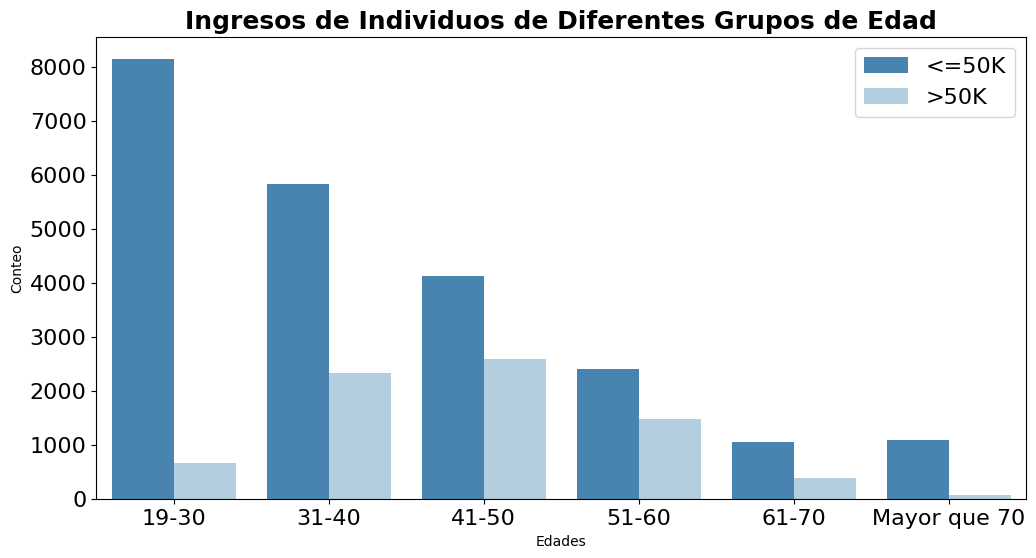

In [ ]:
# creando figura
plt.figure(figsize=(12,6))

# generando grafico
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Mayor que 70']
sns.countplot(x=adultos['categoria_edad'], hue=adultos['ingreso_y'], order=order_list, palette='Blues_r')

# tituloS y leyendas
plt.title('Ingresos de Individuos de Diferentes Grupos de Edad', fontsize=18, fontweight='bold')
plt.xlabel('Edades')
plt.ylabel('Conteo')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

In [ ]:
# creando groupby para generar el grafico
edad_y = adultos.groupby(['categoria_edad', 'ingreso_y']).size().unstack(fill_value=0).reset_index()
edad_y = edad_y.rename(columns={0: '<=50K', 1: '>50K'})

# cambiandolo de formato
edad_y_long = edad_y.melt(
    id_vars='categoria_edad',
    value_vars=['<=50K', '>50K'],
    var_name='variables').sort_values('value', ascending=False)

# calcular las probabilidades y reorganizar los datos
edad_y['probabilidad_edad_>50K'] = ((edad_y['>50K'] / (edad_y['<=50K'] + edad_y['>50K'])) * 100).round(2).astype(float)
edad_y['probabilidad_edad_<=50K'] = 100 - edad_y['probabilidad_edad_>50K']

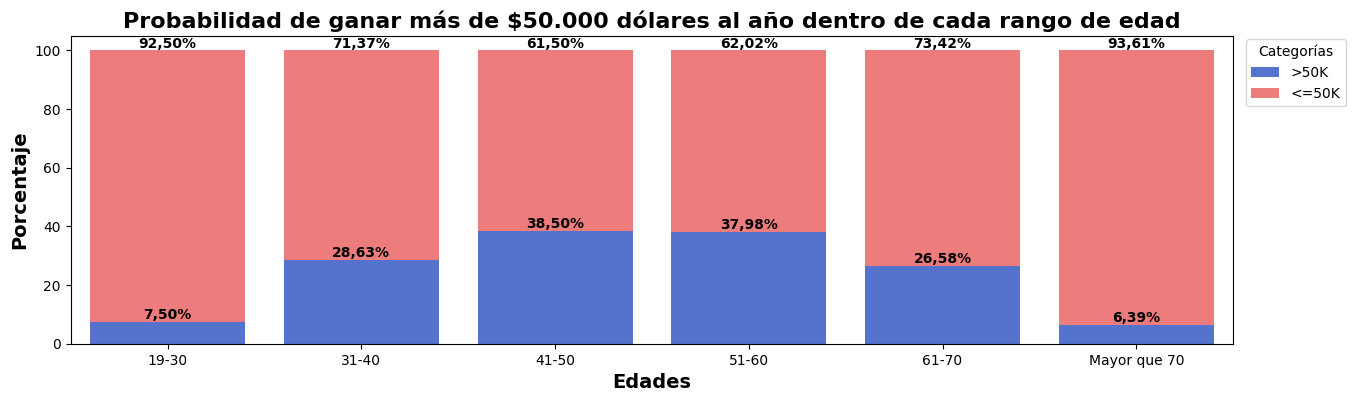

In [ ]:
# generando marco
fig, ax =  plt.subplots(figsize=(15, 4))

# configuar colores
colores = sns.color_palette(['#4169E1', '#FF6B6B'])

# creando barplots
ax = sns.barplot(data=edad_y, x='categoria_edad', y='probabilidad_edad_>50K', label='>50K', palette=[colores[0]])
sns.barplot(data=edad_y, x='categoria_edad', y='probabilidad_edad_<=50K', label='<=50K', bottom=edad_y['probabilidad_edad_>50K'], palette=[colores[1]])

# función para agregar etiquetas de datos a cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%'.replace('.', ','), (x + width/2, y + height + 1), ha='center', fontsize=10, fontweight='bold', color='black')

# configurar etiquetas y leyendas
plt.xlabel('Edades', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje', fontsize=14, fontweight='bold')
plt.title('Probabilidad de ganar más de $50.000 dólares al año dentro de cada rango de edad', fontsize=16, fontweight='bold')

# colocar la leyenda a un lado
plt.legend(title='Categorías', bbox_to_anchor=(1.005, 0.88), loc='center left')

# mostrar el gráfico
plt.show()

**Observaciones e insights**

*  En el gráfico que representa el conteo de personas que ganan más o menos de 50.000 se observa un patrón interesante. A medida que la edad aumenta, la cantidad de personas que ganan más de 50,000 dólares aumenta, hasta cierto punto, formando una especie de gráfico de **campana de Gauss**. Al mismo tiempo, se observa una **correlación negativa** en la cantidad de personas que ganan menos de 50.000 a medida que la edad aumenta.

*  En el segundo gráfico que muestra las probabilidades de ganar más de 50.000, se refuerza el patrón de campana de Gauss observado en el primer gráfico, confirmando la relación entre la edad y la probabilidad de ganar más de 50,000.

Estas observaciones indican que la edad juega un papel importante en la determinación de los ingresos, con un aumento gradual en la probabilidad de ganar más de 50.000 a medida que la edad avanza. Además, el gráfico de conteo y el gráfico de probabilidades destacan cómo esta relación se manifiesta en la distribución de ingresos en la población.

En general, estas observaciones respaldan sólidamente la hipótesis alternativa, sugiriendo que existe una correlación positiva entre la edad y los ingresos, al menos hasta cierto punto en la carrera laboral de las personas.

### 5.2.2. **Cuanto trabajan las personas por edad en promedio.**

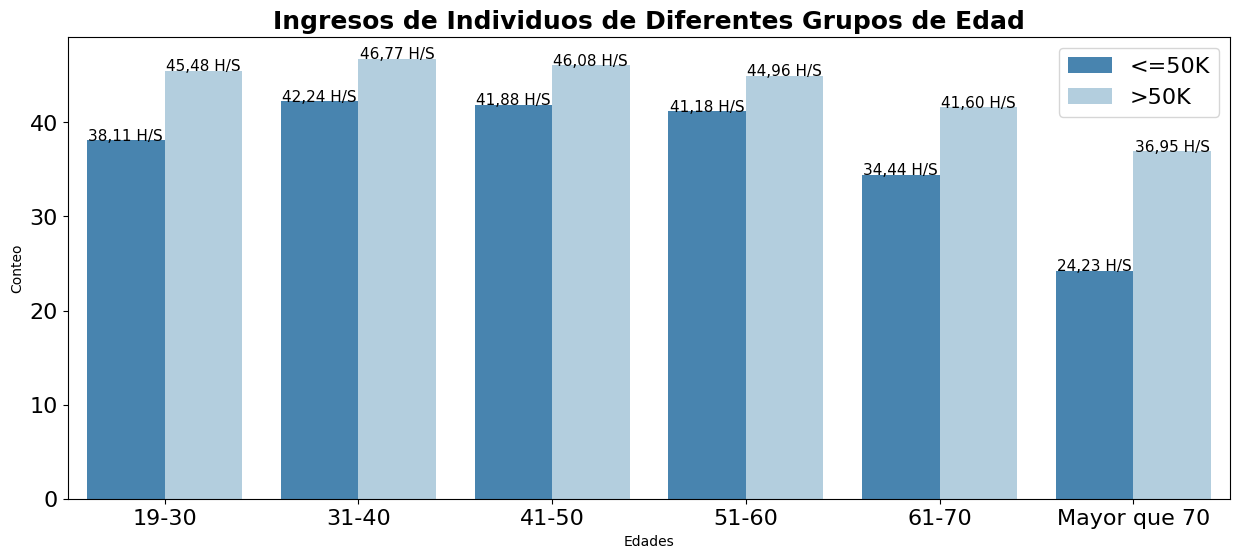

In [ ]:
# haciendo groupby
prom_edad_hrs_trabajo = adultos.groupby(['categoria_edad', 'ingreso_y'])['horas_trabajo_semanal'].mean().reset_index()

# creando figura
plt.figure(figsize=(15,6))

# generando grafico
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Mayor que 70']
ax = sns.barplot(x=prom_edad_hrs_trabajo['categoria_edad'],y=prom_edad_hrs_trabajo['horas_trabajo_semanal'], hue=prom_edad_hrs_trabajo['ingreso_y'], order=order_list, palette='Blues_r')

# agregando etiquetas de datos
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}'.replace('.', ',') + ' H/S', (p.get_x() + p.get_width() / 2., height), ha='center', fontsize=11)

# titulos y leyendas
plt.title('Ingresos de Individuos de Diferentes Grupos de Edad', fontsize=18, fontweight='bold')
plt.xlabel('Edades')
plt.ylabel('Conteo')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

**Observaciones e insights**

En este gráfico, se presentan resultados extremadamente interesantes y sorprendentes.

Se observa que, en todas las edades, las personas que terminan ganando más dinero trabajan más horas, incluso en el grupo de personas de entre 61 y 70 años que tienen ingresos más altos. Estas personas trabajan casi la misma cantidad de horas que las personas de entre 31 y 40 años que ganan menos.

Estos hallazgos resaltan aún más la influencia de la edad en los ingresos y la importancia de la cantidad de horas trabajadas. Además, refuerzan la hipótesis alternativa al demostrar que, en general, una mayor edad se asocia con mayores ingresos y un mayor compromiso laboral. Estos resultados ofrecen una perspectiva interesante sobre cómo la edad y las horas de trabajo contribuyen a la relación entre la edad y los ingresos.

**Conclusión general**

Se observa una relación clara entre la edad y los ingresos, respaldada por un patrón donde a medida que la edad avanza, la probabilidad de ganar más de $50.000 aumenta, formando un gráfico de campana de Gauss. Además, se destaca que, en todas las edades, las personas que ganan más dinero tienden a trabajar más horas. Esto se ilustra incluso en el grupo de personas de entre 61 y 70 años, que ganan más y trabajan casi la misma cantidad de horas que las personas de entre 31 y 40 años que ganan menos.

Estos hallazgos sugieren fuertemente que la edad juega un papel importante en la determinación de los ingresos, y que la hipótesis alternativa, que plantea una correlación positiva entre la edad y los ingresos, está respaldada por los datos. La hipótesis nula, que sugiere que la edad no influye en los ingresos, se ve refutada por estos resultados. En resumen, la edad parece ser un factor determinante en la capacidad de una persona para ganar más dinero, al menos hasta cierto punto en su carrera laboral.

## 5.3. **¿El sexo influye en tu salario?**

Hipótesis

Esta pregunta aborda una cuestión controversial y plantea la relación entre el sexo de una persona y sus ingresos laborales. Se pueden formular dos hipótesis contrapuestas:

*  **H$_1$**: No existe discriminación de género y el sexo no está correlacionado con el salario. Las personas, independientemente de su sexo, tienen las mismas oportunidades de ganar un salario similar.

*  **H$_0$**: El sexo está altamente correlacionado con el salario y existe discriminación de género en el ámbito laboral. El sexo de una persona influye en la cantidad de dinero que ganan.

Estas hipótesis se plantean para investigar si existen diferencias significativas en los ingresos entre diferentes géneros y si estas diferencias pueden interpretarse como discriminación de género en el ámbito laboral.


### 5.3.1. **Probabilidades de ganar mas o menos segun tu sexo.**

In [ ]:
# creando groupby para generar el grafico
sexo_y = adultos.groupby(['sexo', 'ingreso_y']).size().unstack(fill_value=0).reset_index()
sexo_y = sexo_y.rename(columns={0: '<=50K', 1: '>50K'})

# cambiandolo de formato
sexo_y_long = sexo_y.melt(
    id_vars='sexo',
    value_vars=['<=50K', '>50K'],
    var_name='variables').sort_values('value', ascending=False)

# calcular las probabilidades y reorganizar los datos
sexo_y['probabilidad_sexo_>50K'] = ((sexo_y['>50K'] / (sexo_y['<=50K'] + sexo_y['>50K'])) * 100).round(2).astype(float)
sexo_y['probabilidad_sexo_<=50K'] = 100 - sexo_y['probabilidad_sexo_>50K']

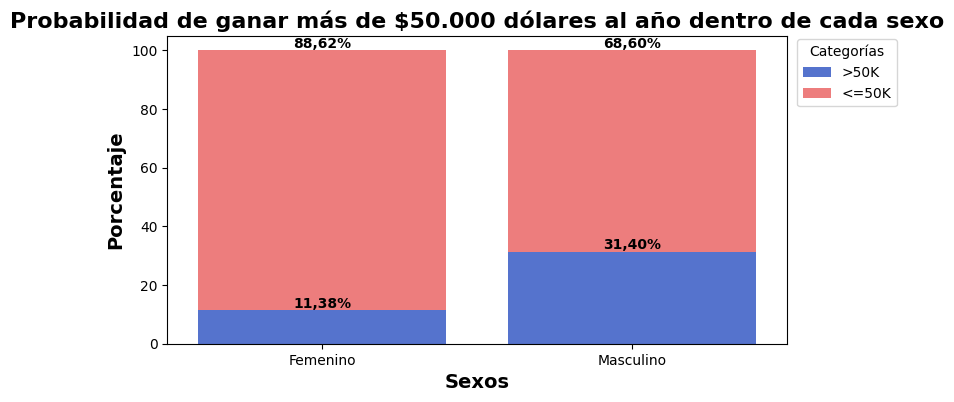

In [ ]:
# generando marco
fig, ax =  plt.subplots(figsize=(8, 4))

# configuar colores
colores = sns.color_palette(['#4169E1', '#FF6B6B'])

# creando barplots
ax = sns.barplot(data=sexo_y, x='sexo', y='probabilidad_sexo_>50K', label='>50K', palette=[colores[0]])
sns.barplot(data=sexo_y, x='sexo', y='probabilidad_sexo_<=50K', label='<=50K', bottom=sexo_y['probabilidad_sexo_>50K'], palette=[colores[1]])

# función para agregar etiquetas de datos a cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%'.replace('.', ','), (x + width/2, y + height + 1), ha='center', fontsize=10, fontweight='bold', color='black')

# configurar etiquetas y leyendas
plt.xlabel('Sexos', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje', fontsize=14, fontweight='bold')
plt.title('Probabilidad de ganar más de $50.000 dólares al año dentro de cada sexo', fontsize=16, fontweight='bold')

# colocar la leyenda a un lado
plt.legend(title='Categorías', bbox_to_anchor=(1.005, 0.88), loc='center left')

# mostrar el gráfico
plt.show()

**Observaciones e insights**

A simple vista, se observa que, sorprendentemente, los hombres tienen aproximadamente el triple de probabilidades de tener un salario alto en comparación con las mujeres. Sin embargo, es importante abordar estas diferencias desde una perspectiva más amplia y considerar múltiples factores antes de concluir si se trata de discriminación de género.

Es esencial llevar a cabo un análisis más profundo que incluya aspectos como las carreras y profesiones que suelen elegir los diferentes géneros, su nivel de formación académica y la cantidad de horas que trabajan a la semana. Estos factores pueden ayudar a comprender si las diferencias en los ingresos se deben a la discriminación de género o si hay otras explicaciones, como diferencias en las elecciones laborales y las oportunidades de educación.

En resumen, aunque los datos iniciales sugieren una disparidad en los ingresos entre hombres y mujeres, es necesario un análisis más detallado para determinar las causas subyacentes de esta diferencia antes de concluir si existe o no discriminación de género en el ámbito laboral.

### 5.3.2. **El trabajo en los sexos.**

In [ ]:
# groupby de conteo de sexo por trabajo y agregando columna con porcentaje
sexo_trabajo = adultos.groupby(['sexo', 'trabajo']).size().reset_index(name='conteo')
sexo_trabajo['porcentaje'] = round((sexo_trabajo['conteo'] / sexo_trabajo.groupby('sexo')['conteo'].transform('sum')) * 100, 2)
# eliminando columna de conteo que ya no necesito
sexo_trabajo = sexo_trabajo.drop('conteo', axis=1)

# ordenar por 'sexo' y 'porcentaje' en orden descendente
sexo_trabajo= sexo_trabajo.sort_values(['sexo', 'porcentaje'], ascending=[False, False])

# Crear una función para separar en generos y sacar porcentajes
def procesar_genero(genero):
    df_genero = sexo_trabajo[sexo_trabajo['sexo'] == genero].reset_index()
    df_genero = df_genero.drop('index', axis=1)
    # establecer como "otros" después de los 4 primeros
    df_genero.loc[df_genero.index > 3, 'trabajo'] = 'otros'
    # filtrar "otros" y calcular el porcentaje total
    otros = df_genero[df_genero['trabajo'] == 'otros']
    suma_porcentajes = otros['porcentaje'].sum()
    # crear una fila con la suma de los porcentajes
    fila_otros = {'sexo': genero, 'trabajo': 'otros', 'porcentaje': suma_porcentajes}
    # eliminar las filas anteriores con "otros" y agregar la fila
    df_genero = df_genero[df_genero['trabajo'] != 'otros']
    df_genero = df_genero.append(fila_otros, ignore_index=True)

    return df_genero

# Procesar datos de género masculino
hombres_trabajo = procesar_genero('Masculino')
# Procesar datos de género femenino
mujeres_trabajo = procesar_genero('Femenino')

<ipython-input-45-5208d0ccc78b>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_genero = df_genero.append(fila_otros, ignore_index=True)
<ipython-input-45-5208d0ccc78b>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_genero = df_genero.append(fila_otros, ignore_index=True)


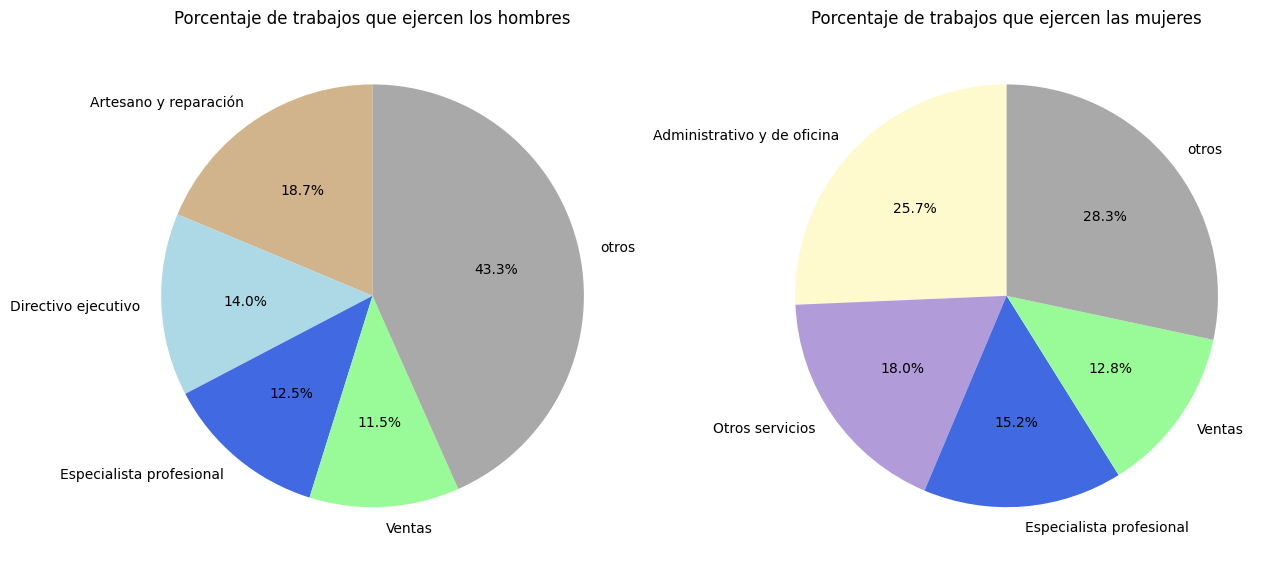

In [ ]:
# especificar colores
colores_hombres = ['#D2B48C', '#ADD8E6', '#4169E1', '#98FB98', '#A9A9A9']
colores_mujeres = ['#FFFACD', '#B19CD9', '#4169E1', '#98FB98', '#A9A9A9']

# crear marco
fig, axes = plt.subplots(1, 2, figsize=(15, 9))

# hombres
axes[0].pie(hombres_trabajo['porcentaje'], labels=hombres_trabajo['trabajo'], autopct='%1.1f%%', startangle=90, colors=colores_hombres)
axes[0].set_title('Porcentaje de trabajos que ejercen los hombres')
axes[0].tick_params(axis='x', rotation=45)
# mujeres
axes[1].pie(mujeres_trabajo['porcentaje'], labels=mujeres_trabajo['trabajo'], autopct='%1.1f%%', startangle=90, colors=colores_mujeres)
axes[1].set_title('Porcentaje de trabajos que ejercen las mujeres')
axes[1].tick_params(axis='x', rotation=45)

# mostrar
plt.show()

**Observaciones e insights**

En el contexto de las diferencias de género en la distribución de trabajos y los ingresos, es importante destacar que las observaciones no permiten llegar a una conclusión definitiva en cuanto a la discriminación de género en el lugar de trabajo. A pesar de las diferencias observadas, las siguientes observaciones son relevantes:

*  Los hombres ocupan dos de los trabajos mejor remunerados entre las ocupaciones más comunes. El cargo de Director Ejecutivo es ejercido por el 14% de los hombres, y el de Especialista Profesional por el 12.5% de los hombres.

*  as mujeres tienen una de las ocupaciones mejor remuneradas entre las más comunes, con un 15.2% de mujeres ocupando el puesto de Especialista Profesional.

*  Es importante destacar que tanto hombres como mujeres comparten dos trabajos comunes, Especialista Profesional y Ventas. Además, uno de estos trabajos comunes, Especialista Profesional, es altamente remunerado.

*  A pesar de la diferencia en la ocupación del puesto de Director Ejecutivo, este solo es ejercido por el 14% de los hombres. Esto indica que no todos los hombres ocupan trabajos altamente remunerados, y muchos hombres pueden estar en ocupaciones menos remuneradas.

Con estas observaciones, no se dispone de evidencia sólida para descartar la hipótesis nula.

### 5.3.3. **El estudio en los sexos.**

In [ ]:
# groupby de conteo de sexo por educacion y agregando columna con porcentaje
sexo_educacion = adultos.groupby(['sexo', 'educacion']).size().reset_index(name='conteo')
sexo_educacion['porcentaje'] = round((sexo_educacion['conteo'] / sexo_educacion.groupby('sexo')['conteo'].transform('sum')) * 100, 2)
# eliminando columna de conteo que ya no necesito
sexo_educacion = sexo_educacion.drop('conteo', axis=1)

# ordenar por 'sexo' y 'porcentaje' en orden descendente
sexo_educacion= sexo_educacion.sort_values(['sexo', 'porcentaje'], ascending=[False, False])

# Crear una función para separar en generos y sacar porcentajes
def procesar_genero(genero):
    df_genero = sexo_educacion[sexo_educacion['sexo'] == genero].reset_index()
    df_genero = df_genero.drop('index', axis=1)
    # establecer como "otros" después de los 4 primeros
    df_genero.loc[df_genero.index > 3, 'educacion'] = 'otros'
    # filtrar "otros" y calcular el porcentaje total
    otros = df_genero[df_genero['educacion'] == 'otros']
    suma_porcentajes = otros['porcentaje'].sum()
    # crear una fila con la suma de los porcentajes
    fila_otros = {'sexo': genero, 'educacion': 'otros', 'porcentaje': suma_porcentajes}
    # eliminar las filas anteriores con "otros" y agregar la fila
    df_genero = df_genero[df_genero['educacion'] != 'otros']
    df_genero = df_genero.append(fila_otros, ignore_index=True)

    return df_genero

# Procesar datos de género masculino
hombres_educacion = procesar_genero('Masculino')
# Procesar datos de género femenino
mujeres_educacion = procesar_genero('Femenino')

<ipython-input-47-111f86a10cfb>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_genero = df_genero.append(fila_otros, ignore_index=True)
<ipython-input-47-111f86a10cfb>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_genero = df_genero.append(fila_otros, ignore_index=True)


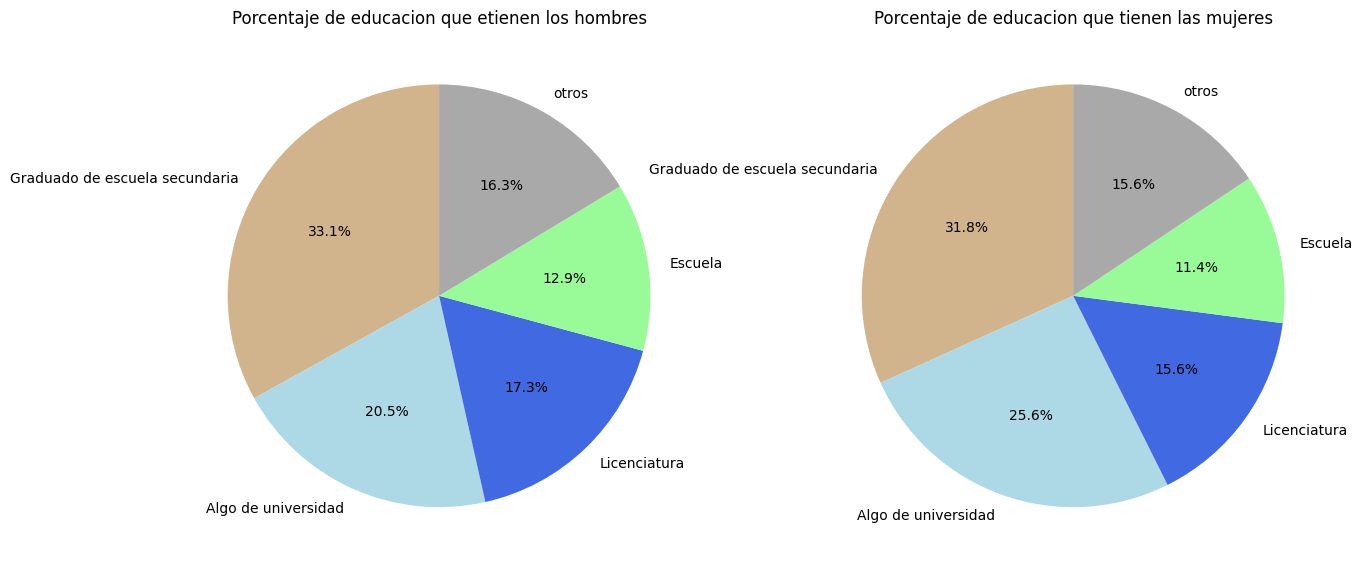

In [ ]:
# especificar colores
colores = ['#D2B48C', '#ADD8E6', '#4169E1', '#98FB98', '#A9A9A9']
# crear marco
fig, axes = plt.subplots(1, 2, figsize=(15, 9))

# hombres
axes[0].pie(hombres_educacion['porcentaje'], labels=hombres_educacion['educacion'], autopct='%1.1f%%', startangle=90, colors=colores)
axes[0].set_title('Porcentaje de educacion que etienen los hombres')
axes[0].tick_params(axis='x', rotation=45)
# mujeres
axes[1].pie(mujeres_educacion['porcentaje'], labels=mujeres_educacion['educacion'], autopct='%1.1f%%', startangle=90, colors=colores)
axes[1].set_title('Porcentaje de educacion que tienen las mujeres')
axes[1].tick_params(axis='x', rotation=45)

# mostrar
plt.show()

**Observaciones e Insights**

Estos resultados son sorprendentes, ya que revelan que la educación entre hombres y mujeres es prácticamente igual. Ambos géneros tienen niveles educativos muy similares en las categorías más comunes, y los porcentajes de educación son casi idénticos.

Este hallazgo refuerza aún más la hipótesis nula, ya que no se encuentra un factor distintivo que explique por qué los hombres tienen más oportunidades o ingresos, más allá de su género. La igualdad en la educación sugiere que las diferencias en los ingresos entre géneros no se deben a disparidades educativas.

### 5.3.4. **Horas de trabajo por sexos.**

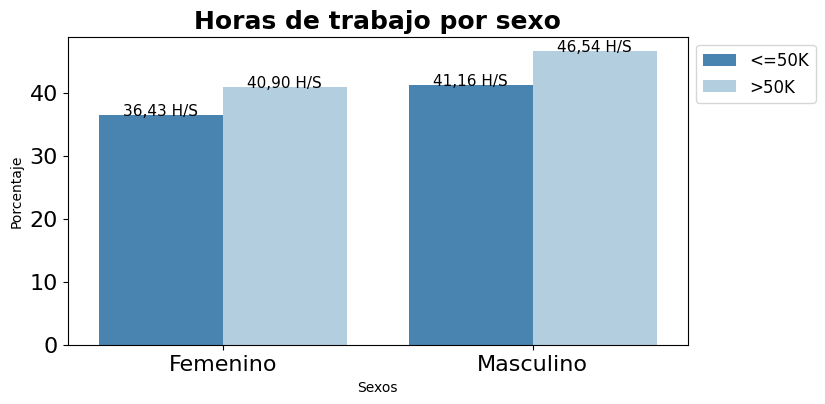

In [ ]:
# haciendo groupby
prom_sexo_hrs_trabajo = adultos.groupby(['sexo', 'ingreso_y'])['horas_trabajo_semanal'].mean().reset_index()

# creando figura
plt.figure(figsize=(8,4))

# generando grafico
ax = sns.barplot(x=prom_sexo_hrs_trabajo['sexo'],y=prom_sexo_hrs_trabajo['horas_trabajo_semanal'], hue=prom_sexo_hrs_trabajo['ingreso_y'] , palette='Blues_r')

# agregando etiquetas de datos
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}'.replace('.', ',') + ' H/S', (p.get_x() + p.get_width() / 2., height), ha='center', fontsize=11)

# titulos y leyendas
plt.title('Horas de trabajo por sexo', fontsize=18, fontweight='bold')
plt.xlabel('Sexos')
plt.ylabel('Porcentaje')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=12)

plt.show()

**Observaciones e insights**

Este dato aporta un fuerte respaldo a la hipótesis alternativa. Se observa que, en general, los hombres trabajan más horas, independientemente de si ganan más o menos que las mujeres. Incluso entre los hombres, aquellos que ganan menos trabajan más horas que las mujeres que ganan más.

**Conclusiones generales**

En este análisis, no es posible tomar una decisión definitiva en favor de una u otra hipótesis. Las relaciones sociales y el mundo laboral son extremadamente complejos, y cada situación puede variar significativamente. Aunque los datos tienden a favorecer la hipótesis nula, es fundamental tomar medidas necesarias para abordar la discriminación de género en cualquier contexto.

Es importante destacar que la tendencia hacia la hipótesis nula no significa que sea aplicable en todos los casos. Las diferencias de género en los ingresos y las oportunidades laborales pueden variar según numerosos factores, y es crucial abordar estos temas de manera individual y considerar medidas para promover la igualdad de género en todas las circunstancias.

En última instancia, este análisis resalta la importancia de seguir investigando y promoviendo la igualdad de género en todos los aspectos de la sociedad y el trabajo, reconociendo que las soluciones pueden ser diversas y adaptadas a cada situación específica.

## 5.4. **¿Como influye la educacion en el salario?**

**Hipótesis**

La hipótesis plantea una relación entre la educación y los ingresos de las personas. Se pueden formular dos hipótesis contrapuestas:

**H$_1$**: Existe una correlación positiva entre el nivel de educación de una persona y sus ingresos. A medida que la educación aumenta, también lo hacen los ingresos.

**H$_0$**: No hay una correlación clara entre el nivel de educación de una persona y sus ingresos. El nivel educativo no influye en la cantidad de dinero que una persona gana.

Estas hipótesis buscan determinar si la educación es un factor significativo en la determinación de los ingresos de las personas.

### 5.4.1 **Probabilidades de ganar mas segun tu educacion.**

In [ ]:
# creando groupby para generar el grafico
educacion_y = adultos.groupby(['educacion', 'ingreso_y']).size().unstack(fill_value=0).reset_index()
educacion_y = educacion_y.rename(columns={0: '<=50K', 1: '>50K'})

# cambiandolo de formato
educacion_y_long = educacion_y.melt(
    id_vars='educacion',
    value_vars=['<=50K', '>50K'],
    var_name='variables').sort_values('value', ascending=False)

# calcular las probabilidades y reorganizar los datos
educacion_y['probabilidad_educacion_>50K'] = ((educacion_y['>50K'] / (educacion_y['<=50K'] + educacion_y['>50K'])) * 100).round(2).astype(float)
educacion_y['probabilidad_educacion_<=50K'] = 100 - educacion_y['probabilidad_educacion_>50K']

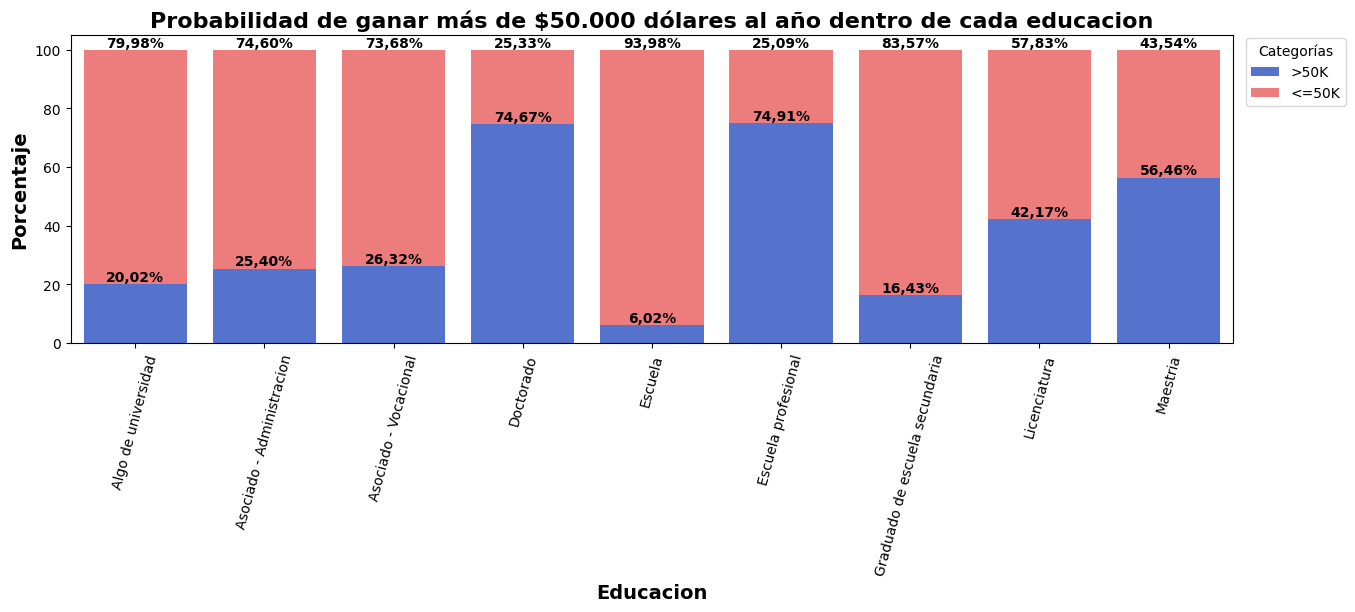

In [ ]:
# generando marco
fig, ax =  plt.subplots(figsize=(15, 4))

# configuar colores
colores = sns.color_palette(['#4169E1', '#FF6B6B'])

# creando barplots
ax = sns.barplot(data=educacion_y, x='educacion', y='probabilidad_educacion_>50K', label='>50K', palette=[colores[0]])
sns.barplot(data=educacion_y, x='educacion', y='probabilidad_educacion_<=50K', label='<=50K', bottom=educacion_y['probabilidad_educacion_>50K'], palette=[colores[1]])

# función para agregar etiquetas de datos a cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%'.replace('.', ','), (x + width/2, y + height + 1), ha='center', fontsize=10, fontweight='bold', color='black')

# configurar etiquetas y leyendas
plt.xlabel('Educacion', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje', fontsize=14, fontweight='bold')
plt.title('Probabilidad de ganar más de $50.000 dólares al año dentro de cada educacion', fontsize=16, fontweight='bold')
plt.xticks(rotation=75)

# colocar la leyenda a un lado
plt.legend(title='Categorías', bbox_to_anchor=(1.005, 0.88), loc='center left')

# mostrar el gráfico
plt.show()

**Observaciones e insights**

Los datos proporcionan evidencia contundente en cuanto a la influencia de la educación en la probabilidad de tener un salario alto:

*  Se observa una relación sólida entre el nivel de educación y la probabilidad de tener un salario elevado. Los resultados son claros: los individuos con educación avanzada, como doctorados y escuelas profesionales, tienen una probabilidad de casi el 75% de tener un buen salario. Además, las personas con maestrías tienen más del 55% de probabilidades de lograrlo, mientras que aquellos con licenciaturas tienen un 42% de probabilidad.

La educación emerge como un factor determinante en la obtención de un salario elevado. Estos hallazgos respaldan de manera significativa la hipótesis alternativa, que sugiere una correlación positiva entre el nivel de educación y los ingresos. La educación se presenta como un factor crucial a la hora de determinar la calidad de los salarios, otorgando un fuerte respaldo a la relación entre educación e ingresos.

**Conclusiones generales**

Los resultados de este análisis respaldan de manera sólida la hipótesis alternativa planteada. Se confirma que la educación desempeña un papel crucial en la determinación de un buen salario. Las observaciones revelan una correlación positiva entre el nivel de educación y la probabilidad de tener ingresos elevados. En resumen, la educación se erige como un factor determinante en el logro de un salario favorable, confirmando la importancia de invertir en la formación académica y el desarrollo profesional para obtener mejores oportunidades económicas.

# 6. **Feature engineering.**

El propósito de esta sección es llevar a cabo ingeniería de características con el fin de preparar el conjunto de datos para su utilización en futuros modelos.

En una primera instancia, llevaremos a cabo un análisis de la distribución de nuestra variable de salida (variable 'y'). Esto nos permitirá comprender su comportamiento y orientar el proceso de feature engineering, así como la construcción de futuros modelos, en función de las observaciones obtenidas.

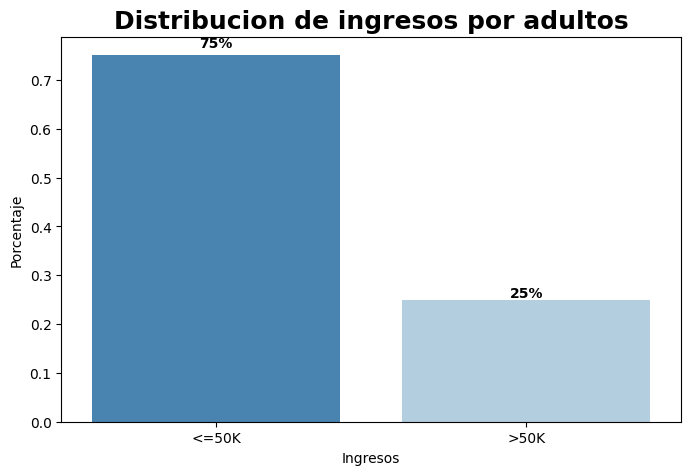

In [ ]:
# figura y barplot
plt.figure(figsize = (8,5))
eda_percentage = adultos['ingreso_y'].value_counts(normalize = True).rename_axis('ingreso_y').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'ingreso_y', y = 'Percentage', data = eda_percentage.head(10), palette='Blues_r')

# titulo, axis y etiqueta de datos
plt.title('Distribucion de ingresos por adultos', fontsize=18, fontweight='bold')
plt.xlabel('Ingresos')
plt.ylabel('Porcentaje')


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

**Análisis del gráfico**

La representación gráfica revela un desequilibrio significativo en nuestra variable de salida. Se observa que existe una cantidad considerablemente mayor de observaciones en la clase negativa (75%) en comparación con la clase positiva (25%). Este desequilibrio es comprensible, ya que es más frecuente que las personas tengan ingresos anuales por debajo de los 50.000 dólares que por encima de este umbral.

Dado este desbalance en los datos, es crucial definir una estrategia que permita abordar de manera óptima esta situación. Se considerarán enfoques como la selección de un punto de corte adecuado, la implementación de modelos de boosting (como XGBOOST), y la posibilidad de equilibrar el conjunto de datos mediante técnicas de aumentación de datos (como SMOTE). Estas estrategias se explorarán con el propósito de abordar eficazmente el desbalance de clases en el modelo.

## 6.1. **Feature selection.**

Esta sección tiene como objetivo reducir la dimensionalidad del dataset, con la intención de eliminar aquellas columnas que no son relevantes para el análisis.

En base al análisis, las únicas columnas que se decidieron eliminar fueron:

1.   fnlwgt
2.   educacion
4.   categoria_edad

Razones:

*   La columna 'fnlwgt' muestra una correlación casi nula con la variable objetivo (y).
*   La columna 'educacion' es redundante, ya que es equivalente a la variable categórica 'educacion_num'.
*   La columna '<=50K' representa lo mismo que su columna opuesta, por lo que también fue eliminada.

Además, se eliminarán todas las filas que contengan el valor "otros" en la columna "trabajo", tal como se mencionó anteriormente, debido a las razones previamente expuestas. Estas decisiones se han tomado con el objetivo de simplificar y mejorar la calidad del conjunto de datos para el análisis subsiguiente.

In [ ]:
# creando copia para ajustar en un futuro
df = adultos.copy()

In [ ]:
# eliminando las columnas
df = df.drop(['fnlwgt', 'educacion', 'categoria_edad'], axis=1)

Dado que la variable 'pais_nativo' exhibe una elevada cardinalidad, se ha optado por sustituir los países correspondientes por sus respectivos continentes.

In [ ]:
# crear un diccionario que asocie países con continentes
diccionario_continentes = {
    'Estados Unidos': 'América del Norte',
    'Mexico': 'América del Norte',
    'Grecia': 'Europa',
    'Vietnam': 'Asia',
    'China': 'Asia',
    'Taiwan': 'Asia',
    'India': 'Asia',
    'Filipinas': 'Asia',
    'Trinidad y Tobago': 'América Central',
    'Canada': 'América del Norte',
    'Sur': 'América del Sur',
    'Paises Bajos': 'Europa',
    'Puerto Rico': 'América del Norte',
    'Polonia': 'Europa',
    'Irán': 'Asia',
    'Inglaterra': 'Europa',
    'Alemania': 'Europa',
    'Italia': 'Europa',
    'Japón': 'Asia',
    'Hong Kong': 'Asia',
    'Honduras': 'América Central',
    'Cuba': 'América Central',
    'Irlanda': 'Europa',
    'Camboya': 'Asia',
    'Perú': 'América del Sur',
    'Nicaragua': 'América Central',
    'Republica Dominicana': 'América Central',
    'Haiti': 'América Central',
    'El Salvador': 'América Central',
    'Hungria': 'Europa',
    'Colombia': 'América del Sur',
    'Guatemala': 'América Central',
    'Jamaica': 'América Central',
    'Ecuador': 'América del Sur',
    'Francia': 'Europa',
    'Yugoslavia': 'Europa',
    'Escocia': 'Europa',
    'Portugal': 'Europa',
    'Laos': 'Asia',
    'Tailandia': 'Asia',
    'Territorios Exteriores de EE. UU.': 'América del Norte',
}

# reemplazar los países por continentes
df['continente_nativo'] = df['pais_nativo'].map(diccionario_continentes)

In [ ]:
# eliminar pais_nativo
df = df.drop('pais_nativo', axis=1)

In [ ]:
# quitar "otros"
df = df[df['trabajo'] != 'otros']

In [ ]:
print('ahora el dataset contiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas.')

ahora el dataset contiene 30139 filas, y 13 columnas.


## 6.2. **Pipelines.**

Emplearemos pipelines para simplificar el código y facilitar la manipulación y transformación de los datos de manera más eficiente.

In [ ]:
# importar libreria para pipeline y transformacion de columnas
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# importar libreria para codificacion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# crear pipeline de codificacion de datos categoricos
cat_pipeline = Pipeline(
    steps=[
        ['one_hot_enc', OneHotEncoder(sparse_output=False, drop='if_binary')]
        ]
    )

# crear pipeline de codificacion de datos numericos
num_pipeline = Pipeline(
    steps=[
        ['estandarizacion', StandardScaler()]
        ]
    )

# crear pipeline para isolation forest
prep_pipeline_if = ColumnTransformer(
    transformers=[
        ['num_features', num_pipeline, ['edad', 'educacion_num', 'plusvalia','perdida_capital', 'horas_trabajo_semanal']],
        ['cat_features', cat_pipeline, ['clase_trabajo', 'estado_civil', 'trabajo', 'relacion', 'raza', 'sexo', 'continente_nativo']],
        ('other', 'passthrough', ['y']) # remainder para que el modelo sepa usar las variables que no se encuentran en el pipeline
      ]
    )

# crear pipeline para preprocesar
prep_pipeline = ColumnTransformer(
    transformers=[
        ['num_features', num_pipeline, ['edad', 'educacion_num', 'plusvalia','perdida_capital', 'horas_trabajo_semanal']],
        ['cat_features', cat_pipeline, ['clase_trabajo', 'estado_civil', 'trabajo', 'relacion', 'raza', 'sexo', 'continente_nativo']]
      ]
    )

## 6.3. **Isolation Forest (Detección de Outliers Multivariados).**

En esta sección, se aplicará la técnica de Isolation Forest para la detección de outliers multivariados en el conjunto de datos.

En primer lugar, se procederá a la visualización de los datos atípicos generados por el modelo.

In [ ]:
# codificar variable y
df['y'] = df['ingreso_y'].map({'<=50K': 0, '>50K': 1})
df = df.drop('ingreso_y', axis=1)

In [ ]:
# resetar indices
df = df.reset_index(drop=True)

In [ ]:
# ajustar df para modelo con pipeline
df_prep = prep_pipeline_if.fit_transform(df)
df_prep = pd.DataFrame(df_prep, columns=prep_pipeline_if.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


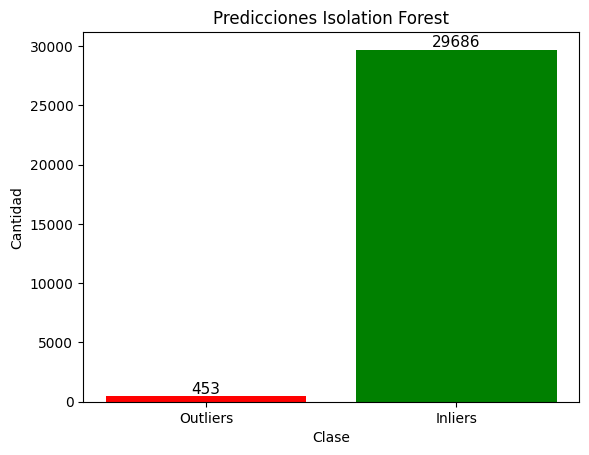

In [ ]:
# importar librerias
from sklearn.ensemble import IsolationForest

# entrenar modelo con el 1,5% de outliers
modelo_if = IsolationForest(contamination=0.015).fit(df_prep)
# predecir
pred_if = modelo_if.predict(df_prep)

# calcular número de outliers e inliers
num_outliers = np.sum(pred_if == -1)
num_inliers = np.sum(pred_if == 1)

# crear grafico de barras
plt.bar(['Outliers', 'Inliers'], [num_outliers, num_inliers], color=['red', 'green'])
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.title("Predicciones Isolation Forest")

# agregar etiquetas a las barras
for i, v in enumerate([num_outliers, num_inliers]):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=11)

# mostrar
plt.show()

In [ ]:
# encontrar indices de outliers
indices_outliers = np.where(pred_if == -1)[0]

# ajustar df para que no tenga outliers
df_sin_outliers = df.drop(indices_outliers)

In [ ]:
print('Ahora el dataset contiene ' + str(df_sin_outliers.shape[0]) + ' filas, y ' + str(df_sin_outliers.shape[1]) + ' columnas.')
print('En total se eliminaron ' + str(df.shape[0] - df_sin_outliers.shape[0]) + ' filas.')

Ahora el dataset contiene 29686 filas, y 13 columnas.
En total se eliminaron 453 filas.


Ahora, como se evidencia en el gráfico, procederemos a la eliminación del 1,5% de los datos del conjunto de datos que el modelo ha clasificado como valores atípicos.

In [ ]:
# resetar los indices de nuevo
df_sin_outliers = df_sin_outliers.reset_index(drop=True)

## 6.4. **Codificación de variables.**

In [ ]:
# creacion de variables de entrada y de salida
X = df_sin_outliers.iloc[:, :-1]
y = df_sin_outliers['y']

In [ ]:
# importar libreria para crear df de entrenamiento y testeo
from sklearn.model_selection import train_test_split

# creando variables de entrenamiento y testeo
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

Podemos chequear cómo quedó cada conjunto de X, correspondientes a:

*  Training y Validation
*  Test

In [ ]:
print('Trainval: ' + str(X_trainval.shape[0]) + ', test: ' + str(X_test.shape[0]))

Trainval: 23748, test: 5938


In [ ]:
# creando df de train y validation codificado
X_trainval = prep_pipeline.fit_transform(X_trainval)
X_trainval = pd.DataFrame(X_trainval, columns=prep_pipeline.get_feature_names_out())

# creando df de test codificado
X_test = prep_pipeline.transform(X_test)
X_test = pd.DataFrame(X_test, columns=prep_pipeline.get_feature_names_out())

# 7. **Modelos de machine learning I.**

Se estará desarrollando un algoritmo de clasificación con el objetivo de predecir de manera altamente precisa y efectiva nuestra variable de respuesta.

## 7.1. **Entrenamiento y validación de modelos.**

En esta sección, se llevará a cabo el proceso de entrenamiento y validación de los modelos. Se evaluarán diferentes algoritmos y ajustes de hiperparámetros para determinar cuál de ellos ofrece el mejor rendimiento en función de la métrica deseada.

In [ ]:
# libreria para validacion cruzada respetando el desbalanceo
from sklearn.model_selection import StratifiedKFold, cross_val_score

# librerias para optimizacion de hiperparametros
from sklearn.model_selection import RandomizedSearchCV

# modelo de regresion logistica
from sklearn.linear_model import LogisticRegression
# modelo de bagging
from sklearn.ensemble import RandomForestClassifier
# modelo de boosting
import xgboost as xgb
from xgboost import XGBClassifier

# metricas
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix, precision_score, recall_score
# graficar matriz de confusion
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# crear objeto con validacion cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True)
# definir metrica a optimizar
scorer = make_scorer(f1_score)

Se ha tomado la decisión de emplear la técnica de optimización "BayesSearch" para todos los modelos, a pesar de existir técnicas superiores como "Buyes". Se espera que, en comparación con sus requisitos de procesamiento, los hiperparámetros encontrados no difieran significativamente de los que se obtendrían con la técnica seleccionada.

In [ ]:
# hiperparametros a optimizar

# regresión logística
lr_hiperparametros = {
    'C': (0.001, 10),                                                          # rango para el parámetro de regularización C
    'penalty': ['l2'],                                                         # elección de tipo de regularización
    'solver': (['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),            # elección de solver
    'max_iter': (1, 10000)                                                     # maximo de iteracciones
}

# random forest
rf_hiperparametros = {
    'n_estimators': (10, 1000),          # rango para el número de estimadores
    'max_depth': (10, 100),              # rango para max_depth, profundidad máxima del árbol
    'min_samples_split': (2, 20),        # rango para min_samples_split, número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': (1, 20)          # rango para min_samples_leaf, número mínimo de muestras requeridas en un nodo hoja
}

# xgboost
xgb_hiperparametros = {
    'n_estimators': (100, 500),             # número de estimadores en el modelo XGBoost
    'learning_rate': (0.01, 1),          # tasa de aprendizaje para actualizar los pesos de los árboles
    'max_depth': (3, 10),                  # profundidad máxima de los árboles en el modelo
    'min_child_weight': (1, 10),           # peso mínimo requerido en un nodo hoja del árbol
    'subsample': (0.5, 1.0),               # proporción de muestras utilizadas para entrenar cada árbol
    'colsample_bytree': (0.5, 1.0)         # proporción de características utilizadas para entrenar cada árbol
}

# definicion de hiperparametros en los modelos
hiperparametros = {
    LogisticRegression(): lr_hiperparametros,
    RandomForestClassifier(): rf_hiperparametros,
    XGBClassifier(): xgb_hiperparametros
}

Una vez definido un objeto para la validación cruzada que no afecte el desbalanceo, la métrica de optimización deseada y los hiperparámetros a optimizar, procederemos a probar diferentes algoritmos y ajustes de hiperparámetros para los modelos seleccionados. Esto nos permitirá encontrar la configuración más efectiva para cada modelo y determinar cuál de ellos se desempeña mejor en función de la métrica elegida.

In [ ]:
# modelo REGRESION LOGISTICA
# crear objeto random
random_lr = RandomizedSearchCV(LogisticRegression(), lr_hiperparametros, cv=cv, n_iter=10, n_jobs=-1, scoring=scorer, random_state=7)
# realizar busqueda
random_lr.fit(X_trainval, y_trainval)

# calcular el F1-score utilizando los mejores hiperparámetros en la validación cruzada
f1_score_lr = cross_val_score(LogisticRegression(**random_lr.best_params_), X_trainval, y_trainval, cv=cv, scoring=scorer)

# mejores hiperparámetros
print('\033[1mREGRESION LOGISTICA:\033[0m')
print('Mejores hiperparámetros encontrados:')
print(f'    {random_lr.best_params_}')
# f1-score de todos los CV
print('F1 de folds:')
print(f'    {f1_score_lr}')
# f1-score promedio
print(f'F1-score promedio con los mejores hiperparámetros: {f1_score_lr.mean():.4f}')

REGRESION LOGISTICA:
Mejores hiperparámetros encontrados:
    {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 10000, 'C': 10}
F1 de folds:
    [0.68061367 0.67134831 0.65899678 0.66228893 0.64528302]
F1-score promedio con los mejores hiperparámetros: 0.6637


In [ ]:
# modelo RANDOM FOREST
# crear objeto random
random_rf = RandomizedSearchCV(RandomForestClassifier(), rf_hiperparametros, cv=cv, n_iter=10, n_jobs=-1, scoring=scorer, random_state=7)
# realizar busqueda
random_rf.fit(X_trainval, y_trainval)

# calcular el F1-score utilizando los mejores hiperparámetros en la validación cruzada
f1_score_rf = cross_val_score(RandomForestClassifier(**random_rf.best_params_), X_trainval, y_trainval, cv=cv, scoring=scorer)

# mejores hiperparámetros
print('\033[1mRANDOM FOREST:\033[0m')
print('Mejores hiperparámetros encontrados:')
print(f'    {random_rf.best_params_}')
# f1-score de todos los CV
print('F1 de folds:')
print(f'    {f1_score_rf}')
# f1-score promedio
print(f'F1-score promedio con los mejores hiperparámetros: {f1_score_rf.mean():.4f}')

RANDOM FOREST:
Mejores hiperparámetros encontrados:
    {'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 100}
F1 de folds:
    [0.68091036 0.68274583 0.68258427 0.67970205 0.70335821]
F1-score promedio con los mejores hiperparámetros: 0.6859


In [ ]:
# modelo XGBOOST
# crear objeto random
random_xgb = RandomizedSearchCV(XGBClassifier(), xgb_hiperparametros, cv=cv, n_iter=30, n_jobs=-1, scoring=scorer, random_state=7)
# realizar busqueda
random_xgb.fit(X_trainval, y_trainval)

# calcular el F1-score utilizando los mejores hiperparámetros en la validación cruzada
f1_score_xgb = cross_val_score(XGBClassifier(**random_xgb.best_params_), X_trainval, y_trainval, cv=cv, scoring=scorer)

# mejores hiperparámetros
print('\033[1mXGBOOST:\033[0m')
print('Mejores hiperparámetros encontrados:')
print(f'    {random_xgb.best_params_}')
# f1-score de todos los CV
print('F1 de folds:')
print(f'    {f1_score_xgb}')
# f1-score promedio
print(f'F1-score promedio con los mejores hiperparámetros: {f1_score_xgb.mean():.4f}')

XGBOOST:
Mejores hiperparámetros encontrados:
    {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 1, 'colsample_bytree': 0.5}
F1 de folds:
    [0.72833408 0.70484988 0.69553201 0.70593607 0.69735007]
F1-score promedio con los mejores hiperparámetros: 0.7064


Después de entrenar y validar los modelos, se puede observar que los mejores resultados se encuentran en el siguiente orden:

In [ ]:
# generar lista con los nombres, los f1_score, y la desviacion std del f1
f1_score_trainval = [f1_score_lr.mean(), f1_score_rf.mean(), f1_score_xgb.mean()]
f1_score_std_trainval = [f1_score_lr.std(), f1_score_rf.std(), f1_score_xgb.std()]
Nombres = ['Regresion Logistica', 'Random Forest', 'XGBoost']

# crear df
modelos = pd.DataFrame({
    'Modelo': Nombres,
    'F1 Score Trainval': [round(score, 4) for score in f1_score_trainval],
    'Std F1 Score Trainval': [round(std, 4) for std in f1_score_std_trainval]
})
# ordenar df en base las metricas de los modelos
modelos = modelos.sort_values(['F1 Score Trainval', 'Std F1 Score Trainval'], ascending=[False, True]).reset_index(drop=True)

print('\033[1mLOS MEJORES MODELOS SON:\033[0m')
print(modelos)

LOS MEJORES MODELOS SON:
                Modelo  F1 Score Trainval  Std F1 Score Trainval
0              XGBoost             0.7064                 0.0117
1        Random Forest             0.6859                 0.0088
2  Regresion Logistica             0.6637                 0.0119


Es lógico que XGBoost, al ser un modelo de boosting, pueda manejar de manera más efectiva conjuntos de datos desbalanceados. Ahora procederemos a probarlo en el conjunto de pruebas para evaluar su desempeño en un entorno real.

## 7.2. **Testeo del mejor modelo.**

En esta sección, se llevará a cabo la evaluación del mejor modelo seleccionado en el conjunto de pruebas. Se medirá su rendimiento en un entorno de evaluación con datos no vistos previamente para verificar su capacidad predictiva.

In [ ]:
# generando y entrenando modelo
modelo_xgb = XGBClassifier(**random_xgb.best_params_, random_state=7)
modelo_xgb.fit(X_trainval, y_trainval)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=7, ...)

In [ ]:
# predecir
pred_xgb = modelo_xgb.predict(X_test)

Definiremos varios puntos de corte con el objetivo de ajustar la relación entre recall y precisión, dado que es probable que exista un desequilibrio en los datos. Asimismo, evaluaremos si estos puntos de corte permiten mejorar el valor de la métrica F1, lo que podría contribuir a un mejor equilibrio entre la capacidad de clasificación y la precisión de nuestro modelo.

In [ ]:
# generando punto de corte
pos_prob = pd.DataFrame(modelo_xgb.predict_proba(X_test)[:, 1], columns=['pos_prob'])

# creando columnas para punto de corte
pos_prob['positivo_25'] = pos_prob['pos_prob'] >= 0.25
pos_prob['positivo_30'] = pos_prob['pos_prob'] >= 0.30
pos_prob['positivo_35'] = pos_prob['pos_prob'] >= 0.35
pos_prob['positivo_40'] = pos_prob['pos_prob'] >= 0.40
pos_prob['positivo_45'] = pos_prob['pos_prob'] >= 0.45
pos_prob['positivo_50'] = pos_prob['pos_prob'] >= 0.50
pos_prob['positivo_55'] = pos_prob['pos_prob'] >= 0.55

In [ ]:
# generar informe
informe = classification_report(y_test, pos_prob['positivo_45'])

# imprimir
print('\033[1mINFORME DE CLASIFICACION:\033[0m')
print(informe)
print(confusion_matrix(y_test, pos_prob['positivo_45']))

INFORME DE CLASIFICACION:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4475
           1       0.73      0.74      0.74      1463

    accuracy                           0.87      5938
   macro avg       0.82      0.83      0.82      5938
weighted avg       0.87      0.87      0.87      5938

[[4084  391]
 [ 384 1079]]


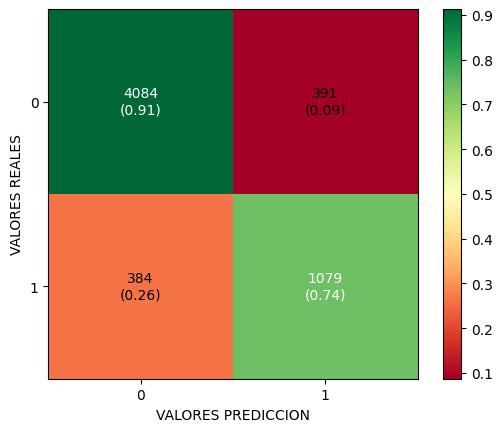

In [ ]:
# crear figura
fig, ax = plot_confusion_matrix(confusion_matrix(y_test, pos_prob['positivo_45']), show_absolute=True, show_normed=True, colorbar=True, cmap='RdYlGn')
# asignar labels
ax.set_ylabel('VALORES REALES')
ax.set_xlabel('VALORES PREDICCION')
# mostrar
plt.show()

[VN   FP]

[FN   VP]

**Evaluación de la matriz de confusión**

Primero, es importante destacar que esta matriz de confusión se obtuvo de la evaluación de un modelo de clasificación. La matriz muestra la comparación entre las predicciones del modelo y las clases reales para un conjunto de datos.

*  Verdaderos Positivos (VP): Hay un total de 1079 verdaderos positivos. Esto indica que el modelo ha identificado correctamente 1079 instancias como positivas.

*  Falsos Positivos (FP): Se han producido 391 falsos positivos. Esto significa que el modelo ha clasificado erróneamente 391 instancias como positivas cuando en realidad son negativas.

*  Verdaderos Negativos (VN): Se han obtenido 4084 verdaderos negativos. Esto indica que el modelo ha acertado al clasificar 4084 instancias como negativas.

*  Falsos Negativos (FN): Hay 384 falsos negativos. Esto significa que el modelo ha fallado al clasificar 384 instancias como negativas cuando en realidad son positivas.

In [ ]:
precision = precision_score(y_test, pos_prob['positivo_45'])
recall = recall_score(y_test, pos_prob['positivo_45'])
f1 = f1_score(y_test, pos_prob['positivo_45'])

modelo_1 = pd.DataFrame({
    'Modelo': 'XGBoost',
    'F1 Trainval': [round(f1_score_xgb.mean(), 2)],
    'F1 Test': [round(f1, 2)],
    'Diferencia Trainval y Test': [round(f1 - f1_score_xgb.mean(), 2)],
    'Precision Test': [round(precision, 2)],
    'Recall Test': [round(recall, 2)]
})

modelo_1

,Modelo,F1 Trainval,F1 Test,Diferencia Trainval y Test,Precision Test,Recall Test
0,XGBoost,0.71,0.74,0.03,0.73,0.74


**Evaluación del modelo**

El modelo XGBoost ha demostrado ser sólido y eficaz en la clasificación de datos, tanto en el conjunto de entrenamiento como en el conjunto de prueba. Con un F1-Score de 0.71 en el conjunto de entrenamiento y 0.74 en el conjunto de prueba, el modelo ha demostrado una buena capacidad para equilibrar la precisión y el recall al ajustar el punto de corte al 45%. Esto es esencial para la toma de decisiones efectiva y la minimización de errores de clasificación.

La ingeniería de características, el ajuste de hiperparámetros y la elección de un modelo adecuado han sido fundamentales para el éxito del proyecto. Estos procesos han resultado en un modelo confiable cuyas predicciones pueden ser utilizadas con confianza en aplicaciones prácticas.

Si bien el modelo ha demostrado un desempeño sólido, siempre es importante explorar formas de mejora continua. Una alternativa prometedora para lograr mejoras adicionales es la implementación de sobremuestreo (oversampling) en los datos, seguido de una técnica de "probability calibration after resampling." Esta estrategia podría contribuir significativamente a mejorar la capacidad predictiva del modelo tanto en el conjunto de entrenamiento como en el conjunto de prueba, optimizando aún más su desempeño.

En resumen, el modelo XGBoost es una herramienta valiosa para la tarea en cuestión y puede ser aún más mejorado mediante técnicas adicionales de procesamiento de datos. La capacidad de adaptación y mejora continua es esencial para garantizar que el modelo siga siendo efectivo en situaciones cambiantes.